<a href="https://colab.research.google.com/github/rociovald/GEOG5990M_Final/blob/main/Accidents%20Antofagasta%2000.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# GEOG5990M Final Assignment

Student ID number: 201773481

## **Import required packages and libraries**

In [ ]:
##  The following packages are installed  #ESTO LO SAQUÉ EL ASSIGNMNET 1
!pip install contextily  # This installs the contextily library.  It is helpful for displaying geographic data on maps.
!pip install geoplot     # This installs the geoplot library. It is useful for working with geospatial data, in maps and data visualisation.
!pip install git+https://github.com/pmdscully/geo_northarrow.git   # This installs the geo_northarrow library which connects to a GitHub repository containing north arrows.
!pip install folium
!pip install h3
!pip install geoplot


  Cloning https://github.com/pmdscully/geo_northarrow.git to /tmp/pip-req-build-jh4arrjn
  Running command git clone --filter=blob:none --quiet https://github.com/pmdscully/geo_northarrow.git /tmp/pip-req-build-jh4arrjn
  Resolved https://github.com/pmdscully/geo_northarrow.git to commit 963bdd271707a3bcaa47b2d83d92b88ae0b10950
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done


In [ ]:
import os
import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
import warnings

sns.set_style("darkgrid")
warnings.filterwarnings("ignore")


## Now the libraries are called up

import pyproj
import contextily as ctx


import geoplot as gplt
import geoplot.crs as gcrs
from geo_northarrow import add_north_arrow

from matplotlib import colors  # is used to extract a subset of a colourmap as a new colourmap in matplotlib (in visualisation)

import h3
from shapely.geometry import Point, Polygon
import folium

In [ ]:
#from google.colab import drive
#drive.mount('/content/drive')

## **Choose data**

In [ ]:
## Read in the spatial dataframe

# Read 3 geojson:

gdfs_2019 = gpd.read_file('https://github.com/rociovald/GEOG5990M_Final/raw/refs/heads/main/Data/Siniestros_transito_Antofa2019.geojson')
gdfs_2020 = gpd.read_file('https://github.com/rociovald/GEOG5990M_Final/raw/refs/heads/main/Data/Siniestros_transito_Antofa2020.geojson')
gdfs_2021 = gpd.read_file('https://github.com/rociovald/GEOG5990M_Final/raw/refs/heads/main/Data/Siniestros_transito_Antofa2021.geojson')
gdfs_2022 = gpd.read_file('https://github.com/rociovald/GEOG5990M_Final/raw/refs/heads/main/Data/Siniestros_transito_Antofa2022.geojson')


#gdfs_2019 = gpd.read_file('https://github.com/rociovald/GEOG5990M_Final/raw/refs/heads/main/Data/accidents_2019.geojson')
#gdfs_2020 = gpd.read_file('https://github.com/rociovald/GEOG5990M_Final/raw/refs/heads/main/Data/accidents_2020.geojson')
#gdfs_2021 = gpd.read_file('https://github.com/rociovald/GEOG5990M_Final/raw/refs/heads/main/Data/accidents_2021.geojson')
#gdfs_2022 = gpd.read_file('https://github.com/rociovald/GEOG5990M_Final/raw/refs/heads/main/Data/accidents_2022.geojson')



**Information on geojson**

gdfs_2019: Corresponde a los accidentes de transito durante 2019 registrados en la region de Antofagasta, Chile <a href="#ref1">[1]</a>

Source: Comision Nacional de Seguridad de Transito. 2021. Siniestros de tránsito, región de Antofagasta, Chile, 2019. [Online]. [Accessed 5 May 2025]. Available from: https://mapas-conaset.opendata.arcgis.com/datasets/50c493754b5d434c8a1c44b96a6e6e44_0/explore?location=-23.708570%2C-69.342709%2C7.95

gdfs_2020: Corresponde a los accidentes de transito durante 2020 registrados en la region de Antofagasta, Chile <a href="#ref1">[2]</a>

Source: Comision Nacional de Seguridad de Transito. 2024. 2020 - Antofagasta - Siniestros Individuales. [Online]. [Accessed 5 May 2025]. Available from:    https://mapas-conaset.opendata.arcgis.com/datasets/5169f61c547e4be9acbc8c4a7b778821_0/explore?location=-23.708640%2C-69.339105%2C7.95

gdfs_2021: Corresponde a los accidentes de transito durante 2021 registrados en la region de Antofagasta, Chile <a href="#ref1">[3]</a>

Source: Comision Nacional de Seguridad de Transito. 2024. 2021 - Antofagasta - Siniestros Individuales. [Online]. [Accessed 5 May 2025]. Available from:   https://mapas-conaset.opendata.arcgis.com/datasets/66fa006d1ea04129965d500b82247352_0/explore?location=-23.397157%2C-69.345849%2C7.76

gdfs_2022: Corresponde a los accidentes de transito durante 2022 registrados en la region de Antofagasta, Chile <a href="#ref1">[4]</a>

Source: Comision Nacional de Seguridad de Transito. 2024. 2022- Antofagasta - Siniestros Individuales. [Online]. [Accessed 5 May 2025]. Available from: https://mapas-conaset.opendata.arcgis.com/datasets/5ce75f6238ac4d89ad4a00969a0fbaaf_0/about


## Contexto (QUIZAS DEJARLO EN EL REDMI)

La Organización Mundial de la Salud, en su informe más reciente sobre traumatismos causados por el tránsito (2023), indica que cada año se producen en todo el mundo aproximadamente 1,19 millones de muertes por accidentes de tránsito. https://www.who.int/es/news-room/fact-sheets/detail/road-traffic-injuries

En Chile, se registran en promedio alrededor de 1.500 muertes anuales por siniestros viales, una cifra que se ha mantenido relativamente estable en los últimos años, aunque con una leve disminución de 12% durante 2023 (CONASET, 2023). La mayoría de estos siniestros tienen como causa principal el factor humano, destacando la imprudencia del conductor y la imprudencia del peatón como las razones más frecuentes de accidentes con resultado fatal.

https://www.conaset.cl/programa/observatorio-datos-estadistica/#:~:text=Observatorio%20de%20Seguridad%20Vial,-El%20Observatorio%20de&text=Durante%20el%20a%C3%B1o%202024%20se,fallecidos%20informados%20el%20a%C3%B1o%202023.


En particular, en la región de Antoafgasta la cantidad de accidentes de trasnito ha ido en aumento, se encuentra por debajo del pormedio nacional en numero de fallecidos y leisonados. La mayoria de los siniestros ocurren en el area urbana. Sin embargo más de la mitad de los decensos ocurren en contextos de ruralidad. fuente: chrome-extension://efaidnbmnnnibpcajpcglclefindmkaj/https://www.conaset.cl/wp-content/uploads/2023/06/Antofagasta-2022.pdf

La región de Antofasgata cuenta con una superficie de 126.049,1 km² y una población de 444,276 habitantes de acuerdo al Censo 2024. Administrativamente está compuesta por 3 provincias (Antofagasta, El Loa y Tocopilla), las que están divididas en 9 comunas. Su capital regional es la ciudad de Antofagasta.

# **Data-preprocessing and data exploration**

Lo primero que se debe hacer es explorar el contenido de la tabla de atributos en cada uno de los geojson, para de este modo conocer los datos que tenemos.

**Accidentes de transito ano 2019**

In [ ]:
gdfs_2019.sample(2)

,FID,Ano,Idaccident,Codregion,Region,Comuna,Zona,Calle1,Calle2,Numero,...,Estado_Cal,Cód_Condi,Condición,Cód_Est_1,Estado_Atm,Fallecidos,Graves,Menos_Grav,Leves,geometry
1996,1997,2019,1240017,2,REGION ANTOFAGASTA,ANTOFAGASTA,URBANA,UNIVERSIDAD DE ANTOFAGASTA,,2925,...,REGULAR,2,HUMEDO,1,DESPEJADO,0,0,0,0,POINT (-70.42438 -23.70577)
1249,1250,2019,1175789,2,REGION ANTOFAGASTA,ANTOFAGASTA,URBANA,FELIX GARCIA,HUAMACHUCO,NULL,...,BUENO,1,SECO,1,DESPEJADO,0,0,0,0,POINT (-70.38253 -23.57083)


In [ ]:
gdfs_2019.info()  # ‘.info()’ is used to observe if there is null data in any variable,  by looking at the ‘Non-Null Count’ column.

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 2494 entries, 0 to 2493
Data columns (total 44 columns):
 #   Column      Non-Null Count  Dtype              
---  ------      --------------  -----              
 0   FID         2494 non-null   int32              
 1   Ano         2494 non-null   int32              
 2   Idaccident  2494 non-null   int32              
 3   Codregion   2494 non-null   int32              
 4   Region      2494 non-null   object             
 5   Comuna      2494 non-null   object             
 6   Zona        2494 non-null   object             
 7   Calle1      2494 non-null   object             
 8   Calle2      2494 non-null   object             
 9   Numero      2494 non-null   object             
 10  lat         2494 non-null   float64            
 11  lng         2494 non-null   float64            
 12  Claseaccid  2494 non-null   int32              
 13  Fecha       2494 non-null   datetime64[ms, UTC]
 14  Cód_Comun   2494 non-null   int3

In [ ]:
# Se visualizan el nombre de todas las columnas, ya que en el codigo anetrior solo se puede ser una parte
gdfs_2019.columns

Index(['FID', 'Ano', 'Idaccident', 'Codregion', 'Region', 'Comuna', 'Zona',
       'Calle1', 'Calle2', 'Numero', 'lat', 'lng', 'Claseaccid', 'Fecha',
       'Cód_Comun', 'Cód_Tipo_', 'Tipo_Accid', 'Cód_Tipo1', 'Tipo__CONA',
       'Cód_Zona', 'Zona_1', 'Cód_Ubica', 'Ubicación', 'Cód_Causa',
       'Causa__CON', 'Cód_Cau_1', 'Causa', 'Pistas_de_', 'Pistas_de1',
       'Cód_Calza', 'Calzada', 'Cód__Tipo', 'Tipo_Calza', 'Cód_Estad',
       'Estado_Cal', 'Cód_Condi', 'Condición', 'Cód_Est_1', 'Estado_Atm',
       'Fallecidos', 'Graves', 'Menos_Grav', 'Leves', 'geometry'],
      dtype='object')

**Co-pilot - description of variables**

La CONASET no dispone de una descripcion de los metadatos para cada uno de los geojson sobre accidentes de transito (anos 2019 al 2022). Razon por lo cual fue necesario realizar una consulta a Copilot para luego verificar si coherencia al mirar el contenido de cada columna de la tabla de atributos. El prompt fue el siguiente: ' Define cada una de las columnas que se encuentran en el csv que te adjunto, en no mas de 20 palabras'.

*Accidentes de transito del 2019*


*   'FID': A unique ID for each accident
*   'Ano': Year the accident occurred
*   'Idaccident': Unique identifier of the accident
*   'Codregion': Code of the region where the accident occurred
*   'Region': Name of the region where the accident occurred
*   'Comuna': Name of the commune where the accident occurred
*   'Zona': Type of zone (urban or rural) where the accident occurred
*   'Calle1': Name of the first street involved in the accident
*   'Calle2': Name of the second street involved in the accident (if applicable).
*   'Numero': Nearest address number to the accident location
*   'lat': Latitude of the accident location
*   'lng': Longitude of the accident location
*   'Claseaccid': Class of the accident (collision, run-over, etc.)
*   'Fecha': Date and time the accident occurred
*   'Cód_Comun': Code of the commune where the accident occurred
*   'Cód_Tipo_': Code of the type of accident
*   'Tipo_Accid': Description of the type of accident
*   'Cód_Tipo1': Secondary code of the type of accident
*   'Tipo__CONA': Secondary description of the type of accident
*   'Cód_Zona': Code of the zone where the accident occurred
*   'Zona_1': Description of the zone (urban or rural)
*   'Cód_Ubica': Code of the specific location of the accident
*   'Ubicación': Description of the specific location of the accident
*   'Cód_Causa': Code of the main cause of the accident
*   'Causa__CON': Description of the main cause of the accident
*   'Cód_Cau_1': Secondary code of the cause of the accident
*   'Causa': Secondary description of the cause of the accident
*   'Pistas_de_': Number of traffic lanes on the road
*   'Pistas_de1': Secondary number of traffic lanes on the road
*   'Cód_Calza': Code of the type of pavement (asphalt, concrete, etc.)
*   'Calzada': Description of the type of pavement (asphalt, concrete, etc.)
*   'Cód__Tipo': Code of the pavement condition (good, fair, etc.)
*   'Tipo_Calza': Description of the pavement condition (good, fair, etc.)
*   'Cód_Estad': Code of the atmospheric conditions at the time of the accident
*   'Estado_Cal': Description of the atmospheric conditions at the time of the accident
*   'Cód_Condi': Code of the weather conditions at the time of the accident
*   'Condición': Description of the weather conditions at the time of the accident
*   'Cód_Est_1': Code of the atmospheric state at the time of the accident
*   'Estado_Atm': Description of the atmospheric state at the time of the accident.
*   'Fallecidos': Number of fatalities in the accident
*   'Graves': Number of people with serious injuries in the accident
*   'Menos_Grav': Number of people with less serious injuries in the accident
*   'Leves': Number of people with minor injuries in the accident
*   'geometry': List the type of geometry, in this case POINT

**Accidentes de transito ano 2020**

In [ ]:
gdfs_2020.sample(2)

,FID,COD_REG,REGION,CUT,COMUNA,CALLE_UNO,CALLE_DOS,NUMERO,DIR_GEOCOD,LAT,...,Tipo_Accid,Tipo__CONA,Zona,Causa__CON,Causa,Fallecidos,Graves,Menos_Grav,Leves,geometry
1543,1544,2,REGION ANTOFAGASTA,2101,ANTOFAGASTA,IQUIQUE,LIMA,0,"Avenida Iquique & Lima, Antofagasta, Chile",-23.638743,...,COLISION,COLISION,URBANA,DESOBEDIENCIA A SEÑALIZACION,SEÑALIZACION DESOBEDECER SEÑAL PARE,0,1,0,0,POINT (-70.39343 -23.63874)
982,983,2,REGION ANTOFAGASTA,2101,ANTOFAGASTA,TAL TAL,CASTRO,0,"Castro & Taltal, Antofagasta, Chile",-23.625532,...,COLISION LATERAL,COLISION,URBANA,IMPRUDENCIA DEL CONDUCTOR,CONDUCCION NO ATENTO CONDICIONES TRANSITO MOMENTO,0,0,0,1,POINT (-70.38454 -23.62553)


In [ ]:
gdfs_2020.info()  # ‘.info()’ is used to observe if there is null data in any variable,  by looking at the ‘Non-Null Count’ column.

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 1951 entries, 0 to 1950
Data columns (total 26 columns):
 #   Column      Non-Null Count  Dtype              
---  ------      --------------  -----              
 0   FID         1951 non-null   int32              
 1   COD_REG     1951 non-null   int32              
 2   REGION      1951 non-null   object             
 3   CUT         1951 non-null   int32              
 4   COMUNA      1951 non-null   object             
 5   CALLE_UNO   1951 non-null   object             
 6   CALLE_DOS   1951 non-null   object             
 7   NUMERO      1951 non-null   int32              
 8   DIR_GEOCOD  1951 non-null   object             
 9   LAT         1951 non-null   float64            
 10  LNG         1951 non-null   float64            
 11  VAL_COM     1951 non-null   int32              
 12  TIPO        1951 non-null   object             
 13  Año         1951 non-null   int32              
 14  Idaccident  1951 non-null   int3

In [ ]:
# Se visualizan el nombre de todas las columnas, ya que en el codigo anetrior solo se puede ser una parte
gdfs_2020.columns

Index(['FID', 'COD_REG', 'REGION', 'CUT', 'COMUNA', 'CALLE_UNO', 'CALLE_DOS',
       'NUMERO', 'DIR_GEOCOD', 'LAT', 'LNG', 'VAL_COM', 'TIPO', 'Año',
       'Idaccident', 'Fecha', 'Tipo_Accid', 'Tipo__CONA', 'Zona', 'Causa__CON',
       'Causa', 'Fallecidos', 'Graves', 'Menos_Grav', 'Leves', 'geometry'],
      dtype='object')

En general los datos son bastantes similares a los del ano 2019, sin embargo tienen un orden diferente.

*Accidentes de transito del 2020*


*   'FID': a unique ID for each accident
*   'COD_REG': Region code
*   'REGION': Name of the region
*   'CUT': Unique territorial code of the commune
*   'COMUNA': Name of the commune
*   'CALLE_UNO': Name of the first street involved in the accident
*   'CALLE_DOS': Name of the second street involved in the accident
*   'NUMERO': Address number of the accident location
*   'DIR_GEOCOD': Geocoded address of the accident location
*   'LAT': Latitude of the accident location
*   'LNG': Longitude of the accident location
*   'VAL_COM': Value of the commune
*   'TIPO': Type of coordinate (approximate, geometric center, etc.)
*   'Año': Year the accident occurred
*   'Idaccident': Unique identifier of the accident
*   'Fecha': Date and time of the accident
*   'Tipo_Accid': Type of accident (collision, run-over, etc.)
*   'Tipo__CONA': Type of collision according to the analysis (frontal, lateral, etc.)
*   'Zona': Zone where the accident occurred (urban, rural)
*   'Causa__CON': Cause of the collision according to the analysis
*   'Causa': Cause of the accident (recklessness, alcohol, etc.)
*   'Fallecidos': Number of fatalities in the accident
*   'Graves': Number of seriously injured people in the accident
*   'Menos_Grav': Number of less seriously injured people in the accident
*   'Leves': Number of minor injuries in the accident
*   'geometry': List the type of geometry, in this case POINT

**Accidentes de transito ano 2021**

In [ ]:
gdfs_2021.sample(2)

,FID,FID_1,LABELID,POINT_X,POINT_Y,FID_2,COMUNAREAL,VAL_COM,OBJECTID,A_O,...,Cód_Condi,Condición,Cód_Est_1,Estado_Atm,Fallecidos,Graves,Menos_Grav,Leves,Ilesos,geometry
71,72,1325,1386266,-70.388708,-23.655499,229,ANTOFAGASTA,1,43383,2021,...,1,SECO,1,DESPEJADO,0,0,0,1,3,POINT (-70.38871 -23.6555)
1603,1604,4512,1363442,-68.941527,-22.448652,111,CALAMA,1,27824,2021,...,1,SECO,1,DESPEJADO,0,0,0,2,1,POINT (-68.94153 -22.44865)


In [ ]:
gdfs_2021.info()  # ‘.info()’ is used to observe if there is null data in any variable,  by looking at the ‘Non-Null Count’ column.

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 2416 entries, 0 to 2415
Data columns (total 70 columns):
 #   Column      Non-Null Count  Dtype              
---  ------      --------------  -----              
 0   FID         2416 non-null   int32              
 1   FID_1       2416 non-null   int32              
 2   LABELID     2416 non-null   int32              
 3   POINT_X     2416 non-null   float64            
 4   POINT_Y     2416 non-null   float64            
 5   FID_2       2416 non-null   int32              
 6   COMUNAREAL  2416 non-null   object             
 7   VAL_COM     2416 non-null   int32              
 8   OBJECTID    2416 non-null   int32              
 9   A_O         2416 non-null   int32              
 10  IDACCIDENT  2416 non-null   int32              
 11  REGION      2416 non-null   object             
 12  COD_COMUN   2416 non-null   int32              
 13  COMUNA      2416 non-null   object             
 14  CALLE_UNO   2416 non-null   obje

In [ ]:
# Se visualizan el nombre de todas las columnas, ya que en el codigo anetrior solo se puede ser una parte
gdfs_2021.columns

Index(['FID', 'FID_1', 'LABELID', 'POINT_X', 'POINT_Y', 'FID_2', 'COMUNAREAL',
       'VAL_COM', 'OBJECTID', 'A_O', 'IDACCIDENT', 'REGION', 'COD_COMUN',
       'COMUNA', 'CALLE_UNO', 'CALLE_DOS', 'NUMERO', 'DIR_GEOCOD', 'PAIS',
       'TIPO', 'OBJECTID_1', 'Año', 'Idaccide_1', 'Claseaccid', 'Fecha',
       'Hora', 'Cód_Regi', 'Región', 'Cód_Comun', 'Comuna_1', 'Cód_Tipo_',
       'Tipo_Accid', 'Cód_Tipo1', 'Tipo__CONA', 'Cód_Zona', 'Zona',
       'Cód_Ubica', 'Ubicación', 'Cód_Causa', 'Causa__CON', 'Cód_Cau_1',
       'Causa', 'Cód_Calle', 'Calle_Un_1', 'Cód_Cal_1', 'Calle_Do_1',
       'Intersecci', 'Número', 'Ruta', 'Cód_Ruta', 'Ubicaci_1', 'Km_Vía_Fe',
       'Pistas_de_', 'Pistas_de1', 'Cód_Calza', 'Calzada', 'Cód__Tipo',
       'Tipo_Calza', 'Cód_Estad', 'Estado_Cal', 'Cód_Condi', 'Condición',
       'Cód_Est_1', 'Estado_Atm', 'Fallecidos', 'Graves', 'Menos_Grav',
       'Leves', 'Ilesos', 'geometry'],
      dtype='object')

Al igual que los geojson anteriores, los datos son muy similares.

*Accidentes de transito del 2021*


*   'FID': A unique ID for each accident
*   'FID_1': Additional unique identifier of the accident
*   'LABELID': Label identifier of the accident
*   'POINT_X': X point of the accident location
*   'POINT_Y': Y point of the accident location
*   'FID_2':Second unique identifier of the accident
*   'COMUNAREAL': Name of the commune where the accident occurred
*   'VAL_COM': Value of the commune where the accident occurred
*   'OBJECTID': Unique identifier of the object on the map
*   'A_O': Year of the accident
*   'IDACCIDENT': Unique identifier of the accident
*   'REGION': Name of the region where the accident occurred
*   'COD_COMUN': Code of the commune where the accident occurred
*   'COMUNA': Name of the commune where the accident occurred
*   'CALLE_UNO': Name of the first street involved in the accident
*   'CALLE_DOS': Name of the second street involved in the accident
*   'NUMERO': Address number where the accident occurred
*   'DIR_GEOCOD': Geocoded address of the accident
*   'PAIS': Country where the accident occurred
*   'TIPO': Type of accident location
*   'OBJECTID_1': Second unique identifier of the object on the map
*   'Año': Year of the accident
*   'Idaccide_1': Second unique identifier of the accident
*   'Claseaccid': Class of the accident (collision, run-over, etc.)
*   'Fecha': Date of the accident
*   'Hora': Time of the accident
*   'Cód_Regi': Code of the region where the accident occurred
*   'Región': Name of the region where the accident occurred
*   'Cód_Comun': Code of the commune where the accident occurred
*   'Comuna_1': Name of the commune where the accident occurred
*   'Cód_Tipo_': Code of the type of accident (collision, run-over, etc.)
*   'Tipo_Accid': Type of accident (collision, run-over, etc.)
*   'Cód_Tipo1':  Additional code of the type of accident
*   'Tipo__CONA': Detailed description of the type of accident
*   'Cód_Zona': Code of the zone where the accident occurred
*   'Zona': Zone where the accident occurred
*   'Cód_Ubica': Code of the specific location of the accident
*   'Ubicación': Specific location of the accident
*   'Cód_Causa': Code of the cause of the accident
*   'Causa__CON': Detailed description of the cause of the accident
*   'Cód_Cau_1': Additional code of the cause of the accident
*   'Causa': General cause of the accident
*   'Cód_Calle': Code of the first street involved in the accident
*   'Calle_Un_1': Detailed name of the first street involved in the accident
*   'Cód_Cal_1': Additional code of the first street involved in the accident
*   'Calle_Do_1': Detailed name of the second street involved in the accident
*   'Intersecci': Intersection where the accident occurred
*   'Número': Specific number in the address where the accident occurred
*   'Ruta': Route or highway where the accident occurred
*   'Cód_Ruta': Code of the route or highway where the accident occurred
*   'Ubicaci_1': Additional description of the specific location of the accident
*   'Km_Vía_Fe': Specific kilometer on the railway where the accident occurred
*   'Pistas_de_': Number of lanes or tracks involved in the accident
*   'Pistas_de1': Additional description of the lanes or tracks involved in the accident
*   'Cód_Calza': Code of the road or surface involved in the accident
*   'Calzada': Detailed description of the road or surface involved in the accident.
*   'Cód__Tipo': Specific code of the type of road or surface involved in the accident
*   'Tipo_Calza': Specific type of road or surface involved in the accident
*   'Cód_Estad': Specific code of the state or condition of the road in the accident
*   'Estado_Cal': State or condition of the road in the accident
*   'Cód_Condi': Specific code of the atmospheric conditions during the accident
*   'Condición': Atmospheric conditions during the accident
*   'Cód_Est_1': Additional code of the atmospheric state during the accident.
*   'Estado_Atm': Atmospheric state during the accident
*   'Fallecidos': Total number of fatalities in the accident
*   'Graves': Total number of serious injuries in the accident
*   'Menos_Grav': Total number of less serious injuries in the accident
*   'Leves': Total number of minor injuries in the accident
*   'Ilesos': Total number of uninjured people in the accident
*   'geometry': List the type of geometry, in this case POINT

**Accidentes de transito ano 2022**

In [ ]:
gdfs_2022.sample(2)

,FID,POINT_X,POINT_Y,Idaccident,Año,Claseaccid,Fecha,Cód_Regi,Región,Cód_Comun,...,Cód_Condi,Condición,Cód_Est_1,Estado_Atm,Fallecidos,Graves,Menos_Grav,Leves,Ilesos,geometry
559,560,-70.384465,-23.609853,1463621,2022,1,2022-07-29 00:00:00+00:00,2,REGION ANTOFAGASTA,2101,...,1,SECO,1,DESPEJADO,0,0,0,0,2,POINT (-70.38447 -23.60985)
1921,1922,-70.393153,-23.576840,1440779,2022,1,2022-04-30 00:00:00+00:00,2,REGION ANTOFAGASTA,2101,...,1,SECO,1,DESPEJADO,0,0,0,2,1,POINT (-70.39315 -23.57684)


In [ ]:
gdfs_2022.info()  # ‘.info()’ is used to observe if there is null data in any variable,  by looking at the ‘Non-Null Count’ column.

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 2366 entries, 0 to 2365
Data columns (total 50 columns):
 #   Column      Non-Null Count  Dtype              
---  ------      --------------  -----              
 0   FID         2366 non-null   int32              
 1   POINT_X     2366 non-null   float64            
 2   POINT_Y     2366 non-null   float64            
 3   Idaccident  2366 non-null   int32              
 4   Año         2366 non-null   int32              
 5   Claseaccid  2366 non-null   int32              
 6   Fecha       2366 non-null   datetime64[ms, UTC]
 7   Cód_Regi    2366 non-null   int32              
 8   Región      2366 non-null   object             
 9   Cód_Comun   2366 non-null   int32              
 10  Comuna      2366 non-null   object             
 11  Cód_Tipo    2366 non-null   int32              
 12  Tipo_Accid  2366 non-null   object             
 13  Cód_Tip_1   2366 non-null   int32              
 14  Tipo__CONA  2366 non-null   obje

In [ ]:
# Se visualizan el nombre de todas las columnas, ya que en el codigo anetrior solo se puede ser una parte
gdfs_2022.columns

Index(['FID', 'POINT_X', 'POINT_Y', 'Idaccident', 'Año', 'Claseaccid', 'Fecha',
       'Cód_Regi', 'Región', 'Cód_Comun', 'Comuna', 'Cód_Tipo', 'Tipo_Accid',
       'Cód_Tip_1', 'Tipo__CONA', 'Cód_Zona', 'Zona', 'Cód_Ubica', 'Ubicación',
       'Cód_Causa', 'Causa', 'Cód_Cau_1', 'Causa__CON', 'Cód_Calle',
       'Calle_Uno', 'Cód_Cal_1', 'Calle_Dos', 'Intersecci', 'Número', 'Ruta',
       'Cód_Ruta', 'Ubicaci_1', 'Pistas_de', 'Pistas_d_1', 'Cód_Calza',
       'Calzada', 'Cód__Tipo', 'Tipo_Calza', 'Cód_Estad', 'Estado_Cal',
       'Cód_Condi', 'Condición', 'Cód_Est_1', 'Estado_Atm', 'Fallecidos',
       'Graves', 'Menos_Grav', 'Leves', 'Ilesos', 'geometry'],
      dtype='object')

Como en los geojson anteriores, los atributos son muy similares, en la mayoria de los casos, no mantienen el mismo nombre en sus columnas para representar lo mismo.

*Accidentes de transito del 2022*


*   'FID': a unique ID for each accident
*   'POINT_X': Longitude of the accident location
*   'POINT_Y': Latitude of the accident location
*   'Idaccident': Unique identifier for the accident
*   'Año': Year when the accident occurred
*   'Claseaccid': Class of the accident
*   'Fecha': Date and time of the accident
*   'Cód_Regi': Code of the region where the accident occurred
*   'Región': Name of the region where the accident occurred
*   'Cód_Comun': Code of the commune where the accident occurred
*   'Comuna': Name of the commune where the accident occurred
*   'Cód_Tipo': Code for the type of accident
*   'Tipo_Accid': Type of accident
*   'Cód_Tip_1': Code for a subtype of accident
*   'Tipo__CONA': Subtype of accident according to CONASET classification
*   'Cód_Zona': Code for the zone where the accident occurred
*   'Zona': Zone where the accident occurred (urban/rural
*   'Cód_Ubica': Code for the specific location within the zone
*   'Ubicación': Specific location within the zone (e.g., intersection)
*   'Cód_Causa': Code for the cause of the accident
*   'Causa': Cause of the accident
*   'Cód_Cau_1': Code for a secondary cause of the accident
*   'Causa__CON': Secondary cause according to CONASET classification
*   'Cód_Calle': Code for the first street involved in the accident
*   'Calle_Uno': Name of the first street involved in the accident
*   'Cód_Cal_1': Code for the second street involved in the accident
*   'Calle_Dos': Name of the second street involved in the accident
*   'Intersecci': Intersection where the accident occurred, if applicable
*   'Número': Street number or route number where the accident occurred
*   'Ruta': Route name or number where the accident occurred
*   'Cód_Ruta': Code for route name or numbe
*   'Ubicaci_1': Additional location informatio
*   'Pistas_de': Number of lanes in one direction
*   'Pistas_d_1': Number of lanes in another direction
*   'Cód_Calza': Code for road surface type
*   'Calzada': Type of road surface (e.g., asphalt)
*   'Cód__Tipo': Code for road type
*   'Tipo_Calza': Type of road (e.g., bidirectional)
*   'Cód_Estad': Code for road condition
*   'Estado_Cal': Condition of road surface (e.g., good)
*   'Cód_Condi': Code for weather condition
*   'Condición': Weather condition at time of accident (e.g., clear)
*   'Cód_Est_1': Code for atmospheric condition
*   'Estado_Atm': Atmospheric condition at time of accident (e.g., clear)
*   'Fallecidos': Number of fatalities in the accident
*   'Graves': Number of people with serious injuries
*   'Menos_Grav': Number of people with less serious injuries
*   'Leves': Number of people with minor injuries
*   'Ilesos': Number of people without injuries
*   'geometry': List the type of geometry, in this case POINT

Como se puede ver en los cuatro geojson de los accidentes de transito, no existe un formato estandar para nombrar a los atributos

*Coordinate Reference Systems (CRS)*

Antes de visualizar las capas, es fundamental asegurarse de que todas utilicen el mismo sistema de coordenadas. Como se observó en todos los geojson, estos están con un EPSG:4326, lo que corresponde a coordenadas geográficas con un datum WGS 1984. Para el área de estudio emplearemos un sistema de coordenadas proyectadas, específicamente WGS 1984 UTM 19S,EPSG:32719, que permite realizar geoprocesamiento utilizando medidas en metros.

In [ ]:
gdfs = [gdfs_2019, gdfs_2020, gdfs_2021, gdfs_2022] # se crea una lista para cada año

In [ ]:
gdfs_utm = [gdf.to_crs(epsg=32719) for gdf in gdfs] # se usa un ciclo for para realizar el cambio del CRS gdfs_2019_utm, gdfs_2020_utm,

In [ ]:
gdfs_2019_utm, gdfs_2020_utm, gdfs_2021_utm, gdfs_2022_utm = gdfs_utm # Se redefine gdfs_utm

In [ ]:
for gdf in gdfs_utm: print(gdf.crs) # Se imprime el resultado

EPSG:32719
EPSG:32719
EPSG:32719
EPSG:32719


In [ ]:
# Using the crs method it is possible to visualise the coordinate reference system that the layer has.
#gdfs_2019.crs

In [ ]:
#gdfs_2019_utm = gdfs_2019.to_crs(epsg=32719)
#gdfs_2019_utm.crs # Check that the change has been made

In [ ]:
#gdfs_2020.crs

In [ ]:
#gdfs_2020_utm = gdfs_2020.to_crs(epsg=32719)
#gdfs_2020_utm.crs # Check that the change has been made

In [ ]:
#gdfs_2021.crs

In [ ]:
#gdfs_2021_utm = gdfs_2021.to_crs(epsg=32719)
#gdfs_2021_utm.crs # Check that the change has been made

In [ ]:
#gdfs_2022.crs

In [ ]:
#gdfs_2022_utm = gdfs_2022.to_crs(epsg=32719)
#gdfs_2022_utm.crs # Check that the change has been made

In [ ]:
# check the row and column of dataframe
gdfs_2019_utm.shape

(2494, 44)

In [ ]:
# check the row and column of dataframe
gdfs_2020_utm.shape

(1951, 26)

In [ ]:
# check the row and column of dataframe
gdfs_2021_utm.shape

(2416, 70)

In [ ]:
# check the row and column of dataframe
gdfs_2022_utm.shape

(2366, 50)

La cantidad de filas y columnas son distintos en todos los años.

In [ ]:
# Summary statistics
#gdfs_2019_utm.describe()  # using 'describe()' you get the descriptive statisticsfor all variables: count, mean, std, min, 25%, 50% 75%, max.

In [ ]:
# Summary statistics
#gdfs_2020_utm.describe()  # using 'describe()' you get the descriptive statisticsfor all variables: count, mean, std, min, 25%, 50% 75%, max.

In [ ]:
# Summary statistics
#gdfs_2021_utm.describe()  # using 'describe()' you get the descriptive statisticsfor all variables: count, mean, std, min, 25%, 50% 75%, max.

In [ ]:
# Summary statistics
#gdfs_2022_utm.describe()  # using 'describe()' you get the descriptive statisticsfor all variables: count, mean, std, min, 25%, 50% 75%, max.

## **Data cleaning**

Se verifican las columnas en comun

* Como se observó al cargar los datos, los DataFrame tienen diferentes columnas.

In [ ]:
gdfs = [gdfs_2019_utm, gdfs_2020_utm, gdfs_2021_utm, gdfs_2022_utm] # creo una lista llamada gdfs que contiene los accidentes de transito de los cuatro años en estudio.

In [ ]:
gdf_columns = [gdf.columns for gdf in gdfs] # se crea una lista llamada gdf_columns que tiene a todas las columnas de los GeoDataFrame en gdfs.
gdf_columns_intersection = set.intersection(*map(set, gdf_columns)) # se convierte a cada lista de columnas en un conjunto para despues usar 'set.intersection' para encontrar las columnas comunes.

In [ ]:
# Se identifican las columnas comunes entre todos los dataframe
gdf_columns_intersection

{'Causa',
 'Causa__CON',
 'FID',
 'Fallecidos',
 'Fecha',
 'Graves',
 'Leves',
 'Menos_Grav',
 'Tipo_Accid',
 'Tipo__CONA',
 'Zona',
 'geometry'}

In [ ]:
# Se identifican las columnas diferentes entre los dataframe
for cols in gdf_columns:
  print([col for col in cols if col not in gdf_columns_intersection]) # imprime las columnas que no están en la intersección de columnas

['Ano', 'Idaccident', 'Codregion', 'Region', 'Comuna', 'Calle1', 'Calle2', 'Numero', 'lat', 'lng', 'Claseaccid', 'Cód_Comun', 'Cód_Tipo_', 'Cód_Tipo1', 'Cód_Zona', 'Zona_1', 'Cód_Ubica', 'Ubicación', 'Cód_Causa', 'Cód_Cau_1', 'Pistas_de_', 'Pistas_de1', 'Cód_Calza', 'Calzada', 'Cód__Tipo', 'Tipo_Calza', 'Cód_Estad', 'Estado_Cal', 'Cód_Condi', 'Condición', 'Cód_Est_1', 'Estado_Atm']
['COD_REG', 'REGION', 'CUT', 'COMUNA', 'CALLE_UNO', 'CALLE_DOS', 'NUMERO', 'DIR_GEOCOD', 'LAT', 'LNG', 'VAL_COM', 'TIPO', 'Año', 'Idaccident']
['FID_1', 'LABELID', 'POINT_X', 'POINT_Y', 'FID_2', 'COMUNAREAL', 'VAL_COM', 'OBJECTID', 'A_O', 'IDACCIDENT', 'REGION', 'COD_COMUN', 'COMUNA', 'CALLE_UNO', 'CALLE_DOS', 'NUMERO', 'DIR_GEOCOD', 'PAIS', 'TIPO', 'OBJECTID_1', 'Año', 'Idaccide_1', 'Claseaccid', 'Hora', 'Cód_Regi', 'Región', 'Cód_Comun', 'Comuna_1', 'Cód_Tipo_', 'Cód_Tipo1', 'Cód_Zona', 'Cód_Ubica', 'Ubicación', 'Cód_Causa', 'Cód_Cau_1', 'Cód_Calle', 'Calle_Un_1', 'Cód_Cal_1', 'Calle_Do_1', 'Intersecci', '

In [ ]:
# Se observan todos los nombres de las columnas que no son iguales entre los gdfs, y se renombran las columnas que se van a utilizar:
renames = {
  'Ano': 'Year',
  'Año': 'Year',
  'Region': 'Region',
  'REGION': 'Region',
  'Región': 'Region',
  'COMUNA': 'Commune',
  'Comuna': 'Commune',
  'Fallecidos': 'Fatalities',
  'Graves':'Serious',
  'Menos_Grav': 'Less serious',
  'Menos_grav': 'Less serious',
  'Leves': 'Slight',
  'Tipo__CONA': 'Type',
  'Causa__CON': 'Cause',
  'Fecha': 'Date'
  }

In [ ]:
# Se seleccionan solo algunas columnas que se utilizaran posteriormente
select = ['Year', 'Region', 'Commune', 'Date', 'Type', 'Cause', 'Fatalities', 'Serious', 'Less serious', 'Slight', 'geometry']

In [ ]:
gdfs = [gdf.rename(columns=renames)[select] for gdf in gdfs] # Se crea una lista de gdfs con las columnas ya renombradas y seleccionadas.
gdfs_2019_utm, gdfs_2020_utm, gdfs_2021_utm, gdfs_2022_utm =gdfs # Se asigna cada gdfs en la lista a una variable especifica, que corresponde a cada ano.

In [ ]:
# Diccionario de traducción para la columna 'Type' (tipo de accidente)
#type_translation = {
    #'Choque': 'Crash',
    #'Colisión': 'Collision',
    #'Atropello': 'Hit snd Run',
    #'Volcadura': 'Rolleover',
    #'Incendio': 'Fire',
    #'Otro': 'Other'
#}

In [ ]:
# Diccionario de traducción para la columna 'Cause' (causa del accidente)
#cause_translation = {
    #'IMPRUDENCIA DEL CONDUCTOR': 'Driver negligence',
    #'OTRAS CAUSAS': 'Other causes',
    #'CAUSAS NO DETERMIANDAS': 'Undetermined causes',
    #'DESOBEDIENCIA A SEÑALIZACION': 'Sign disobedience',
    #'IMPRUDENCIA DEL PEATON': 'Pedestrian Negligence',
    #'CONDICIONES AMBIENTALES': 'Enviromental conditions',
    #'VELOCIDAD IMPRUDENTE':'Reckless speed',
    #'NO MANTENER DISTANCIA': 'Not keeping distance',
    #'MANIOBRA IMPRUDENTE':'Reckless maneuver',
    #'PERDIDA DE CONTROL': 'Loss of control'
#}

In [ ]:
# Aplicar la traducción a la columna 'Type' usando el método map()
# Esto reemplaza los valores en español por sus equivalentes en inglés
#gdfs['Type'] = gdfs['Type'].map(type_translation)


In [ ]:
gdfs_2019_utm.sample(3) # Se revisa si el código anterior se ejecutó correctamente

,Year,Region,Commune,Date,Type,Cause,Fatalities,Serious,Less serious,Slight,geometry
2378,2019,REGION ANTOFAGASTA,CALAMA,2019-05-29 00:00:00+00:00,COLISION,IMPRUDENCIA DEL CONDUCTOR,0,0,0,0,POINT (506870.314 7515527.721)
2060,2019,REGION ANTOFAGASTA,TOCOPILLA,2019-12-18 00:00:00+00:00,CHOQUE,IMPRUDENCIA DEL CONDUCTOR,0,0,0,0,POINT (376363.205 7556589.298)
1329,2019,REGION ANTOFAGASTA,ANTOFAGASTA,2019-03-10 00:00:00+00:00,COLISION,DESOBEDIENCIA A SEÑALIZACION,0,0,0,0,POINT (359112.761 7390191.5)


## Concatenación

Ya hemos visualizado el contenido de los datos por separado, es decir por cada ano. Ahora vamos a unir los cuatro geojson en uno solo para poder visualizar la cantidad total de fallecidos, graves, menos graves y leves para cada año en una misma tabla.

Sin embargo existen columnas duplicadas en uno de los DataFrames, lo que puede haber ocurrido al moemnto de renombrarlas.

In [ ]:
# Se visualizan (en orden, comenzando desde el 2019 al 2022) cada uno de los DatFrame y se observa que el
# del año 2021 (el tercero) tiene la columna 'Region' repetida.
for gdf in gdfs: # Se crea un bucle for para iterar cada elemento de la lista gdfs
    print(gdf.columns)  # Se muestra el nombre de la columna

Index(['Year', 'Region', 'Commune', 'Date', 'Type', 'Cause', 'Fatalities',
       'Serious', 'Less serious', 'Slight', 'geometry'],
      dtype='object')
Index(['Year', 'Region', 'Commune', 'Date', 'Type', 'Cause', 'Fatalities',
       'Serious', 'Less serious', 'Slight', 'geometry'],
      dtype='object')
Index(['Year', 'Region', 'Region', 'Commune', 'Date', 'Type', 'Cause',
       'Fatalities', 'Serious', 'Less serious', 'Slight', 'geometry'],
      dtype='object')
Index(['Year', 'Region', 'Commune', 'Date', 'Type', 'Cause', 'Fatalities',
       'Serious', 'Less serious', 'Slight', 'geometry'],
      dtype='object')


Se identifica que habían columnas duplicadas en uno de los DataFrames (gdfs_2021), lo que es necesario corregir antes de concatenar todos los DataFrame en uno solo, sino arroja error.

In [ ]:
# Se eliminan las columnas duplicadas. Se obtuvo de Stack Overflow: https://stackoverflow.com/questions/14984119/python-pandas-remove-duplicate-columns
gdfs_2021_utm = gdfs_2021_utm.loc[:,~gdfs_2021_utm.columns.duplicated()].copy() # Con '.loc' se selecciona las columnas que no estan duplicadas.

In [ ]:
# Se revisa y ya no aparece la columna duplicada
gdfs_2021_utm.sample()

,Year,Region,Commune,Date,Type,Cause,Fatalities,Serious,Less serious,Slight,geometry
675,2021,REGION ANTOFAGASTA,ANTOFAGASTA,2021-07-31 00:00:00+00:00,VOLCADURA,ALCOHOL EN CONDUCTOR,0,0,0,1,POINT (357117.796 7380782.144)


In [ ]:
# Subsanando el error, ya no hay problemas con concatenar
# By fixing the error there are no problems with concatenating
gdfs_all = pd.concat([gdfs_2019_utm, gdfs_2020_utm, gdfs_2021_utm, gdfs_2022_utm], ignore_index=True)

In [ ]:
# Se revisa que se hayan integrado los datos de cada año
gdfs_all.sample(5)

,Year,Region,Commune,Date,Type,Cause,Fatalities,Serious,Less serious,Slight,geometry
2180,2019,REGION ANTOFAGASTA,CALAMA,2019-09-23 00:00:00+00:00,CHOQUE,DESOBEDIENCIA A SEÑALIZACION,0,0,0,0,POINT (506974.146 7518318.225)
8296,2022,REGION ANTOFAGASTA,TOCOPILLA,2022-10-08 00:00:00+00:00,CHOQUE,CAUSAS NO DETERMINADAS,0,0,0,0,POINT (376704.974 7556346.769)
5558,2021,REGION ANTOFAGASTA,ANTOFAGASTA,2021-09-20 00:00:00+00:00,CHOQUE,ALCOHOL EN CONDUCTOR,0,0,0,0,POINT (358358.829 7387903.488)
7176,2022,REGION ANTOFAGASTA,ANTOFAGASTA,2022-06-16 00:00:00+00:00,COLISION,IMPRUDENCIA DEL CONDUCTOR,0,0,0,0,POINT (357615.292 7383030.581)
4312,2020,REGION ANTOFAGASTA,ANTOFAGASTA,2020-03-08 00:00:00+00:00,COLISION,IMPRUDENCIA DEL CONDUCTOR,0,0,0,1,POINT (358281.154 7385613.524)


Se observa que en la columan 'Type' los nombres estan en mayuscula y en espanol, se decide cambiar al ingles.

In [ ]:
# Renombrar los valores de la columna 'Type' con nombres en ingles
#gdfs_all.replace({'Colision': 'Collision',
                  #'Atropello': 'Hit-and-run',
                  #'Choque': 'Crash',
                  #'Volcamiento': 'Overturning',
                  #'Incendio': 'Fire',
                  #'Otro': 'Another'}, inplace=True)

In [ ]:
#gdfs_all['Type'] = gdfs_all['Type'].replace(type_renaming)

Lo siguiente es colocar correctamente el nombre de las comunas del gdfs_all

In [ ]:
#Identificar las comunas
communes = np.sort(gdfs_all['Commune'].unique()) # Con 'np.sort' se ordenan las communes alfabeticamente, con .unique() se eliminan los duplicados, obteniendo la lista de las comunas.
communes

array(['ANTOFAGASTA', 'CALAMA', 'MARIA ELENA', 'MEJILLONES',
       'SAN PEDRO AT', 'SAN PEDRO ATACAMA', 'SIERRA GORDA', 'TALTAL',
       'TOCOPILLA'], dtype=object)

Se observa que todos aparecen con mayuscula, por lo que se decide dejar con mayuscula solo la primera letra. Además uno de los nombres aparece cortado y repetido ('SAN PEDRO AT' y 'SAN PEDRO ATACAMA')

In [ ]:
# Se cambia de el nombre de las comunas (de mayuscula a minuscula) usando '.replace'.
gdfs_all.replace({'ANTOFAGASTA': 'Antofagasta',
                  'CALAMA': 'Calama',
                  'MARIA ELENA': 'Maria Elena',
                  'MEJILLONES': 'Mejillones',
                  'SAN PEDRO AT': 'San Pedro Atacama',
                  'SAN PEDRO ATACAMA': 'San Pedro Atacama',
                  'SIERRA GORDA': 'Sierra Gorda',
                  'TALTAL':'Taltal',
                  'TOCOPILLA':'Tocopilla'}, inplace=True)  # con 'inplace=True' los cambios se aplican directamente al DataFrame original, sin necesidad de reasignarlo.

In [ ]:
group = gdfs_all.groupby(['Commune', 'Year'])[['Fatalities',
                                               'Serious',
                                               'Less serious',
                                               'Slight']].sum().unstack().fillna(0)  # Los datos se agrupan por 'Commune' y luego por 'year'. Se seleccionan las columnas Fatalities', 'Serious', 'Less serious', 'Slight'
                                                                           # Luego se suman usando '.sum'
                                                                           # con '.unstack()' convierte a 'Year' en columnas, ya que se trata del indice de nivel mas bajo.
                                                                           # con fillna(0) se reemplazan los valores NaN por ceros.


In [ ]:
group

Fatalities                   Serious                    \
Year                    2019  2020  2021  2022    2019  2020  2021  2022   
Commune                                                                    
Antofagasta             14.0  11.0  15.0  13.0   107.0  78.0  99.0  96.0   
Calama                   2.0   7.0   5.0  12.0    44.0  55.0  50.0  59.0   
Maria Elena              0.0   0.0   0.0   1.0     0.0   0.0   0.0   0.0   
Mejillones               0.0   1.0   0.0   0.0     1.0   0.0   0.0   1.0   
San Pedro Atacama        0.0   0.0   0.0   0.0     1.0   1.0   0.0   0.0   
Sierra Gorda             0.0   0.0   0.0   0.0     0.0   0.0   0.0   0.0   
Taltal                   0.0   0.0   0.0   1.0     1.0   2.0   1.0   2.0   
Tocopilla                0.0   0.0   0.0   1.0     3.0   6.0   6.0   6.0   

                  Less serious                   Slight                       
Year                      2019  2020  2021  2022   2019   2020   2021   2022  
Commune                                                                       
Antofagasta               40.0  47.0  55.0  41.0  706.0  604.0  688.0  516.0  
Calama                    38.0  41.0  28.0  25.0  375.0  283.0  337.0  350.0  
Maria Elena                0.0   0.0   0.0   3.0    0.0    0.0    0.0    2.0  
Mejillones                 0.0   1.0   0.0   0.0    5.0    5.0    2.0    0.0  
San Pedro Atacama          1.0   0.0   0.0   0.0    3.0    4.0    0.0    4.0  
Sierra Gorda               0.0   0.0   0.0   0.0    0.0    0.0    2.0    0.0  
Taltal                     0.0   1.0   0.0   2.0   14.0   15.0    5.0    4.0  
Tocopilla                  3.0   2.0   1.0   4.0   33.0   42.0   55.0   37.0

In [ ]:

df_total = gdfs_all.groupby('Commune')[['Fatalities', 'Serious', 'Less serious', 'Slight']].sum().unstack().reset_index()

In [ ]:
# Se renombran las columnas generadas, usando '.rename'.
df_total.rename(columns={'level_0': 'Type',
                         0: 'Accidents'}, inplace=True) # con 'inplace=True' los cambios se aplican directamente al DataFrame original, sin necesidad de reasignarlo.

In [ ]:
df_total.sample() # para ver si funciona, si se agregó 'Accidents' correctamente.

,Type,Commune,Accidents
9,Serious,Calama,208


##Exploratory Data Analysis

Ya con los datos limpios se procede a revisar sus estadisticas y visualizarlos por medio de graficos (son visualizaciones intermedias, solo con el proposito de explorar).

In [ ]:
# Summary statistics
gdfs_2019_utm.describe()  # using 'describe()' you get the descriptive statisticsfor all variables: count, mean, std, min, 25%, 50% 75%, max.

,Year,Fatalities,Serious,Less serious,Slight
count,2494.0,2494.000000,2494.000000,2494.000000,2494.000000
mean,2019.0,0.006415,0.062951,0.032879,0.455493
std,0.0,0.084729,0.255793,0.182798,0.865286
min,2019.0,0.000000,0.000000,0.000000,0.000000
25%,2019.0,0.000000,0.000000,0.000000,0.000000
50%,2019.0,0.000000,0.000000,0.000000,0.000000
75%,2019.0,0.000000,0.000000,0.000000,1.000000
max,2019.0,2.000000,2.000000,2.000000,13.000000


In [ ]:
# Summary statistics
gdfs_2020_utm.describe()  # using 'describe()' you get the descriptive statisticsfor all variables: count, mean, std, min, 25%, 50% 75%, max.

,Year,Fatalities,Serious,Less serious,Slight
count,1951.0,1951.000000,1951.000000,1951.000000,1951.000000
mean,2020.0,0.009739,0.072783,0.047155,0.488467
std,0.0,0.103317,0.269534,0.239296,0.825084
min,2020.0,0.000000,0.000000,0.000000,0.000000
25%,2020.0,0.000000,0.000000,0.000000,0.000000
50%,2020.0,0.000000,0.000000,0.000000,0.000000
75%,2020.0,0.000000,0.000000,0.000000,1.000000
max,2020.0,2.000000,2.000000,5.000000,6.000000


In [ ]:
# Summary statistics
gdfs_2021_utm.describe()  # using 'describe()' you get the descriptive statisticsfor all variables: count, mean, std, min, 25%, 50% 75%, max.

,Year,Fatalities,Serious,Less serious,Slight
count,2416.0,2416.000000,2416.000000,2416.000000,2416.000000
mean,2021.0,0.008278,0.064570,0.034768,0.450745
std,0.0,0.090626,0.260535,0.194201,0.827113
min,2021.0,0.000000,0.000000,0.000000,0.000000
25%,2021.0,0.000000,0.000000,0.000000,0.000000
50%,2021.0,0.000000,0.000000,0.000000,0.000000
75%,2021.0,0.000000,0.000000,0.000000,1.000000
max,2021.0,1.000000,3.000000,3.000000,8.000000


In [ ]:
# Summary statistics
gdfs_2022_utm.describe()  # using 'describe()' you get the descriptive statisticsfor all variables: count, mean, std, min, 25%, 50% 75%, max.

,Year,Fatalities,Serious,Less serious,Slight
count,2366.0,2366.000000,2366.000000,2366.000000,2366.000000
mean,2022.0,0.011834,0.069315,0.031699,0.385883
std,0.0,0.108163,0.291263,0.186911,0.757957
min,2022.0,0.000000,0.000000,0.000000,0.000000
25%,2022.0,0.000000,0.000000,0.000000,0.000000
50%,2022.0,0.000000,0.000000,0.000000,0.000000
75%,2022.0,0.000000,0.000000,0.000000,1.000000
max,2022.0,1.000000,6.000000,2.000000,9.000000


Respecto a las estadisticas descriptivas de los accidentes durante el periodo de estudio. Se observa que para todos los anos los heridos leves son los mas frecuentes. Por otro lado, respecto al promedio de fallecidos en general se mantiene bajo, pero hubo un leve aumento en el 2021 que se mantuvo durante el 2022. Mientras que los heridos graves y menos graves muestran una tendencia al descenso desde 2019. Cabe destacar que del 2019 al 2020 se aprecia una disminucion en todos los tipos de victimas, lo cual se puede atribibuir a las restricciones de movilidad que existieron durnate la pandemia. Se registro un aumento de fallecidos, con una disminucion en heridos leves y menos graves durante 2020 a 2021. Mientras que desde 2021 a 2022 no se observan cmabios significativos.

Conclusion: se observa una evolucion positiva en cuanto a la reduccion de heridos, pero al mismo tiempo existe un aumento en la letalidad en los accidentes recientes. Esto destaca la importancia de fortalecer las politicas de seguridad vial, con foco en la prevencion de accidentes fatales.

*Grafico de barra horizontal (grafico intermedio, NO FINAL)*

Segun Esselman (2021) es mejor usar un vertical chart cuando los datos que se quieren representar son ordinales, es decir en categorias, como es el caso las comunas (grafico a continuacion), type y cause (mas abajo).  https://www.storytellingwithdata.com/blog/2022/1/21/which-bar-orientation-should-i-use

COMO MEJORAR O ENCHULAR ESTE GRAFICO??? INTENTE QUE APARECIERA EL NUMERO DE CANTIDAD DE ACCIDENTES EN CADA BARRA PERO NO FUNCIONO

Text(0.5, 1.0, 'Accidents by commune')

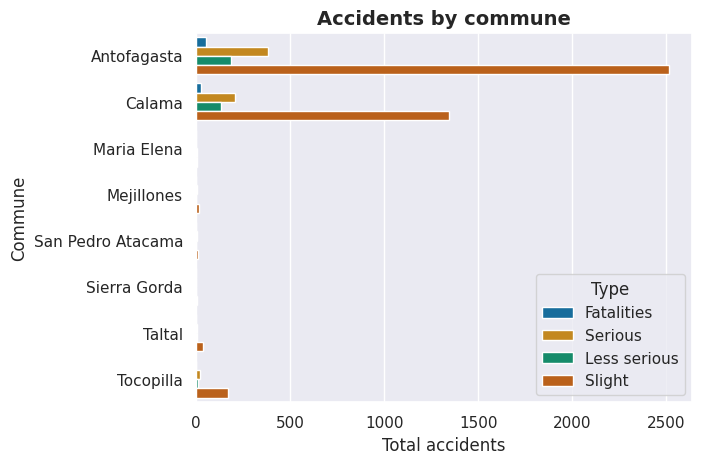

In [ ]:
# A personalised colour palette is created, designed for people with colour blindness, for this purpose, the function sns.color_palette():

#palet_colorblind = sns.color_palette('colorblind')

# The choice of the palette was based on the documentation ‘Choosing colour palettes’ (https://seaborn.pydata.org/tutorial/color_palettes.html).
sns.barplot(df_total, x='Accidents', y='Commune', hue='Type', palette= 'colorblind') # Crea un gráfico de barras con seaborn.
                                                              # Se diferencian los tipos de accidentes ('Type') con diferentes colores usando 'hue'.

plt.xlabel('Total accidents') # Designa la etiqueta del eje X como "Total accidents".
plt.ylabel('Commune')  # Designa la etiqueta del eje Y como "Commune".
plt.title('Accidents by commune', fontsize=14, fontweight='bold') # Asigna un título al gráfico, con tamano 14 y negrita.

En el grafico anterior se peude observar que las comunas que concentran una mayor cantidad de accidentes de tránsito son Antofagasta (capital regional) y Calama, en ambas dominan los accidentes slight (más de 2500 en Antofagasta y más de 1300 en Calama) seguido por los de tipo serious (alredeor de 400 y 200 respectivamente). Por esta razón que se observará con un poco más de detalle como se componen los accidentes en estas dos comunas.





## Comuna de Antofagasta

In [ ]:
# Se realiza un filtro para solo considerar a la comuna Antofagasta.
gdf_anto = gdfs_all[gdfs_all['Commune']== 'Antofagasta']

In [ ]:
# Se agrupan los datos filtrados  por año y suma de cada tipo de accidente usando '.groupby'.
# Luego se reorganiza el DataFrame usando '.unstack' y se reinica el índice con '.reset_index()'.
df_total_anto = gdf_anto.groupby('Year')[['Fatalities', 'Serious', 'Less serious', 'Slight']].sum().unstack().reset_index()

In [ ]:
# Se renombran las columnas generadas, usanado '.rename'.
df_total_anto.rename(columns={'level_0': 'Type',
                              0: 'Accidents'}, inplace=True)

In [ ]:
# Se convierte la columna 'Year' a tipo string para que los años se traten como texto (útil para gráficos categóricos).
df_total_anto['Year'] = df_total_anto['Year'].astype(str)

Text(0.5, 1.0, 'Accidents Antofagasta')

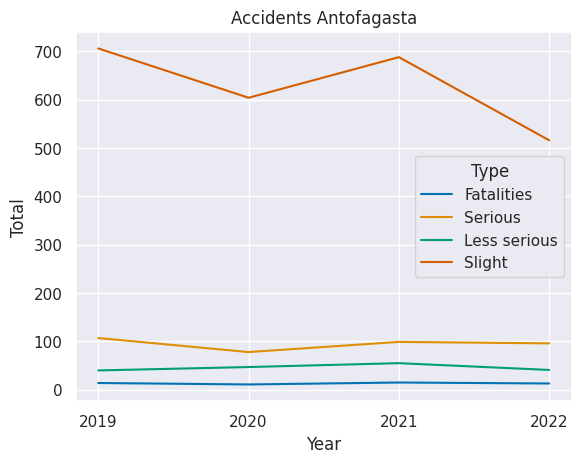

In [ ]:
# El siguiente es un grafico intermedio (solo exploratorio).
# The choice of the palette was based on the documentation ‘Choosing colour palettes’ (https://seaborn.pydata.org/tutorial/color_palettes.html).
sns.lineplot(df_total_anto, x='Year', y='Accidents', hue='Type', palette= 'colorblind') # Se usa la paleta 'colorblind' para asegurar accesibilidad visual.

# Se añade etiquetas a los ejes y un título al gráfico.
plt.xlabel('Year') # Etiqueta del eje X.
plt.ylabel('Total') # Etiqueta del eje Y.
plt.title('Accidents Antofagasta') # Título del gráfico.

JUSTIFICAR CON FUENTES POR QUE ELEGI ESTA REPRESENTACION DE GRAFICOS

In [ ]:
#gdf_anto['Type']= gdf_anto['Type'].str.capitalize() # esta linea se genero con copilot 'crea un codigo en python para que en una columna el texto aparece con mayusculas, dejar
                                                    # solo la primera letra en mayuscula y las demas en minusculas.' 14 de mayo

# SE DEBE ELIMINAR ESTA LINEA PORQUE IGUAL DEBO CAMBIAR EL NOMBRE AL INGLES

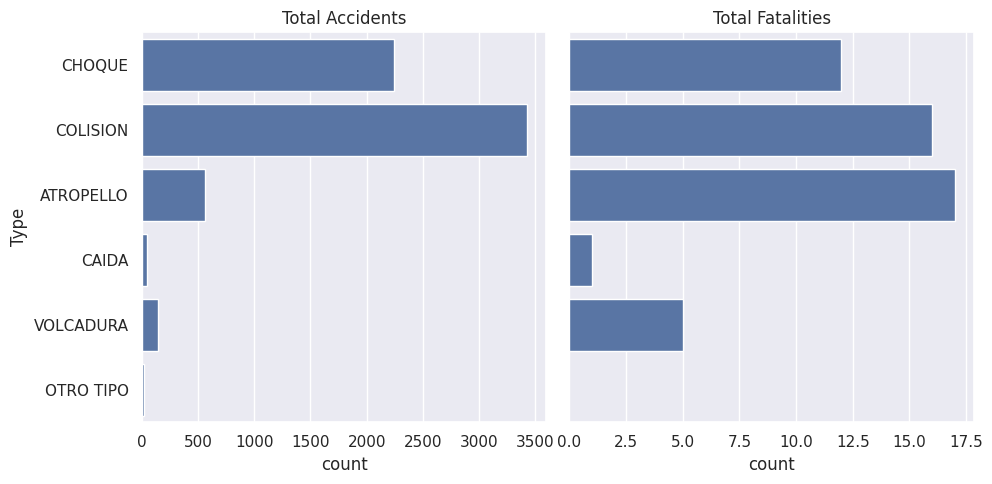

In [ ]:
# Fuente: https://stackoverflow.com/questions/25239933/how-to-add-a-title-to-each-subplot

# Se crea una figura con 1 fila y 2 columnas de subgráficos usando '.subplots'.
# 'figsize' define el tamaño total de la figura (10 pulgadas de ancho por 5 de alto).
# sharey=True hace que ambos subgráficos compartan el mismo eje Y.
fig, axs = plt.subplots(1, 2, figsize=(10, 5), sharey=True)


# Primer gráfico: cuenta la cantidad de accidentes por tipo en todo el DataFrame 'gdf_anto'y lo dibuja en el primer subplot (axs[0]).
sns.countplot(gdf_anto, y='Type', ax=axs[0])
axs[0].title.set_text('Total Accidents') # le asigna un título al primer subplot


# Segundo gráfico: filtra solo los accidentes con al menos una fatalidad y cuenta cuántos hay por tipo, dibujándolo en el segundo subplot (axs[1]).
sns.countplot(gdf_anto[gdf_anto['Fatalities'] > 0], y='Type', ax=axs[1])
axs[1].title.set_text('Total Fatalities') # Le asigna un título al segundo subplot.


# Se ajusta automáticamente el diseño para que los elementos no se sobrepongan
plt.tight_layout()

In [ ]:
# gdf_anto['Cause']= gdf_anto['Cause'].str.capitalize()
# PERO EN RELAIDAD DEBO CAMBIAR EL NOMBRE DE LAS VARIABLES AL INGLES

<Axes: xlabel='count', ylabel='Cause'>

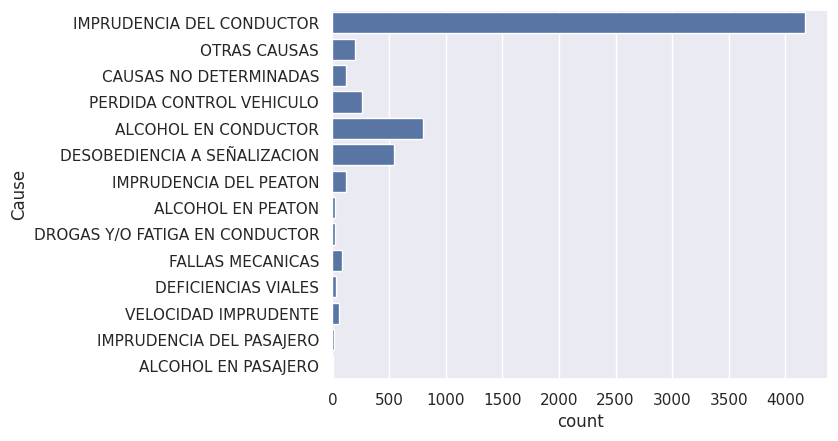

In [ ]:
# Se crea un gráfico de barras que cuenta la cantidad de registros por cada valor en la columna 'Cause'. El eje Y mostrará las distintas causas.
sns.countplot(gdf_anto, y='Cause')

## Comuna de Calama

In [ ]:
# Se realiza un filtro para solo considerar a la comuna Calama.
gdf_calama = gdfs_all[gdfs_all['Commune']== 'Calama']

In [ ]:
# Se agrupan los datos filtrados  por año y suma de cada tipo de accidente usando '.groupby'
# Luego se reorganiza el DataFrame usando '.unstack' y se reinica el índice con '.reset_index()'
df_total_calama = gdf_calama.groupby('Year')[['Fatalities', 'Serious', 'Less serious', 'Slight']].sum().unstack().reset_index()

In [ ]:
# Se renombran las columnas generadas, usanado '.rename'.
df_total_calama.rename(columns={'level_0': 'Type',
                              0: 'Accidents'}, inplace=True)

In [ ]:
# Se convierte la columna 'Year' a tipo string para que los años se traten como texto (útil para gráficos categóricos).
df_total_calama['Year'] = df_total_calama['Year'].astype(str)

Text(0.5, 1.0, 'Accidents Calama')

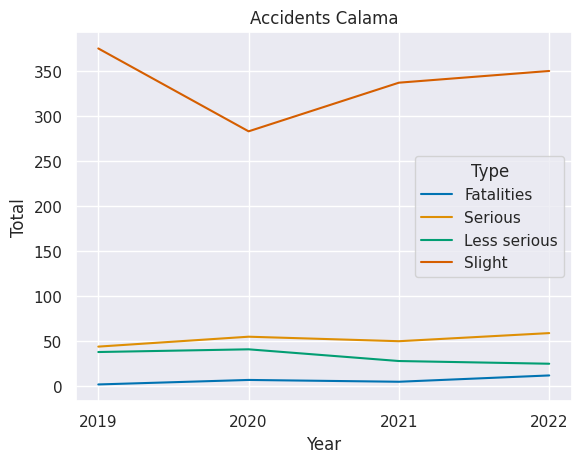

In [ ]:
# El siguiente es un grafico intermedio (solo exploratorio).
# The choice of the palette was based on the documentation ‘Choosing colour palettes’ (https://seaborn.pydata.org/tutorial/color_palettes.html).
sns.lineplot(df_total_calama, x='Year', y='Accidents', hue='Type', palette= 'colorblind')    # Se usa la paleta 'colorblind' para asegurar accesibilidad visual.
plt.xlabel('Year')
plt.ylabel('Total')
plt.title('Accidents Calama')

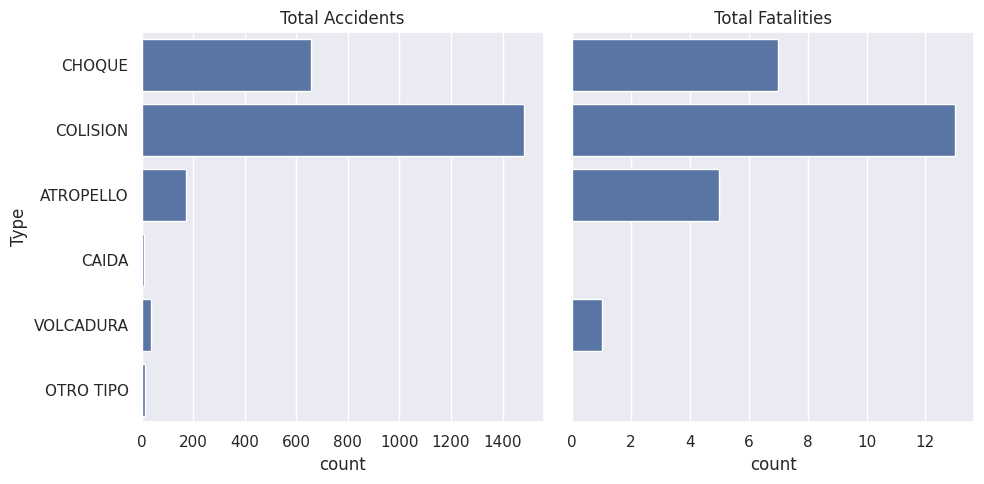

In [ ]:
# Fuente: https://stackoverflow.com/questions/25239933/how-to-add-a-title-to-each-subplot

# Se crea una figura con 1 fila y 2 columnas de subgráficos usando '.subplots'.
# 'figsize' define el tamaño total de la figura (10 pulgadas de ancho por 5 de alto).
# sharey=True hace que ambos subgráficos compartan el mismo eje Y.
fig, axs = plt.subplots(1, 2, figsize=(10, 5), sharey=True)

# Primer gráfico: cuenta la cantidad de accidentes por tipo en todo el DataFrame 'gdf_anto'y lo dibuja en el primer subplot (axs[0]).
sns.countplot(gdf_calama, y='Type', ax=axs[0])
axs[0].title.set_text('Total Accidents')

# Segundo gráfico: filtra solo los accidentes con al menos una fatalidad y cuenta cuántos hay por tipo, dibujándolo en el segundo subplot (axs[1]).
sns.countplot(gdf_calama[gdf_calama['Fatalities'] > 0], y='Type', ax=axs[1])
axs[1].title.set_text('Total Fatalities')

# Se ajusta automáticamente el diseño para que los elementos no se sobrepongan
plt.tight_layout()

<Axes: xlabel='count', ylabel='Cause'>

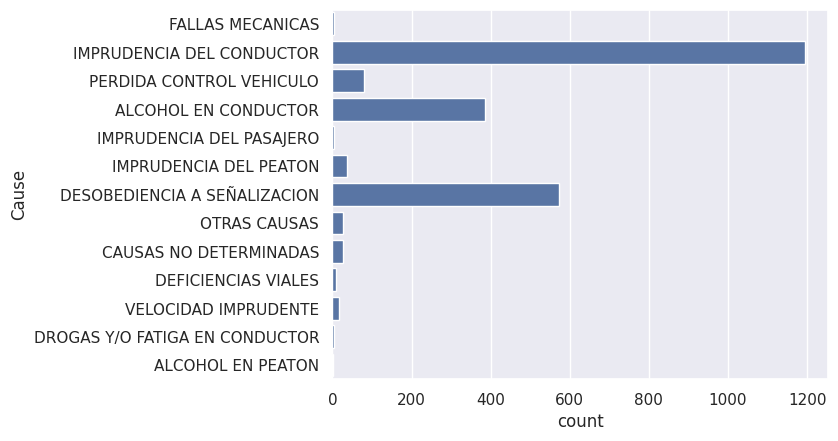

In [ ]:
# Se crea un gráfico de barras que cuenta la cantidad de registros por cada valor en la columna 'Cause'. El eje Y mostrará las distintas causas.
sns.countplot(gdf_calama, y='Cause')
# NECESITO VER EL NUMERO EN CADA GRAFICO O VERLO A PARTE, PARA PONERLO EN EL TEXTO.

Al comparar los accidentes en ambas comunas, se observa que Antofagasta es la que presneta un mayor numero de siniestros y de fatalidades en casi todas las categorias, lo cual puede estar relacionado a que esta comuna posee una mayor cantidad de poblacion y mayor flujo vehicular al ser la capital regional. Mientras que Calama, aunque con cifras menores, muestra patrones similares en cuanto a los tipos y causas de accidentes.
En ambas comunas la imprudencia del conductor es la causa mas frecuente, con cifras similares. Esto sugiere que las estrategias de prevencion deberian enfocarse en la educacion vial y la fiscalizacion  

Health facilities
- Se revisa el geojson con la información de los hospitales del pais.


In [ ]:
health_facilities = gpd.read_file('https://github.com/rociovald/GEOG5990M_Final/raw/refs/heads/main/Data/health_facilities_2024.geojson')

In [ ]:
health_facilities.crs # Se revisa su sistema de cordenadas proyectadas

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [ ]:
health_facilities = health_facilities.to_crs(epsg=32719) # Se cambia a UTM 19 sur

In [ ]:
health_facilities.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 4613 entries, 0 to 4612
Data columns (total 40 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   FID         4613 non-null   int32   
 1   COD_ANT     4613 non-null   object  
 2   COD_VIG     4613 non-null   int32   
 3   COD_M_ANT   4613 non-null   object  
 4   COD_M_NUEV  4613 non-null   object  
 5   COD_REG     4613 non-null   int32   
 6   NOM_REG     4613 non-null   object  
 7   COD_DEP     4613 non-null   int32   
 8   DEPENDENC   4613 non-null   object  
 9   PERTENENCI  4613 non-null   object  
 10  TIPO        4613 non-null   object  
 11  AMBITO      4613 non-null   object  
 12  NOMBRE      4613 non-null   object  
 13  CERTIFI     4613 non-null   object  
 14  DEP_ADM     4613 non-null   object  
 15  NIVEL       4613 non-null   object  
 16  COD_COM     4613 non-null   object  
 17  NOM_COM     4613 non-null   object  
 18  VIA         4613 non-null   object  
 19

In [ ]:
# Se renombran los nombres de las columnas que se van a seleccionar
renames = {
    'TIPO': 'Type',
    'NOMBRE': 'Name',
    'URGENCIA': 'Urgency',
    'REGION': 'Region',
    'PROVINCIA': 'Province',
    'COMUNA': 'Commune'
}

In [ ]:
health_facilities.rename(columns=renames, inplace=True)

In [ ]:
# Se verifican los cambios
print(health_facilities.columns)

Index(['FID', 'COD_ANT', 'COD_VIG', 'COD_M_ANT', 'COD_M_NUEV', 'COD_REG',
       'NOM_REG', 'COD_DEP', 'DEPENDENC', 'PERTENENCI', 'Type', 'AMBITO',
       'Name', 'CERTIFI', 'DEP_ADM', 'NIVEL', 'COD_COM', 'NOM_COM', 'VIA',
       'NUMERO', 'DIRECCION', 'FONO', 'F_INICIO', 'Urgency', 'TIPO_URGE',
       'CLAS_SAPU', 'LATITUD', 'LONGITUD', 'PRESTADOR', 'ESTADO', 'COMPLEJIDA',
       'TIPO_ATEN', 'F_INCR', 'CUT_REG', 'CUT_PROV', 'CUT_COM', 'Region',
       'Province', 'Commune', 'geometry'],
      dtype='object')


In [ ]:
# Se filtran por la región 'ANTOFAGASTA'
health_facilities_anto=health_facilities[(health_facilities['Region']== 'ANTOFAGASTA') & (health_facilities['Urgency'] == 'SI')]

In [ ]:
# Se crea un nuevo DataFrame seleccionando solo las columnas renombradas
select = ['Type', 'Name', 'Urgency', 'Region', 'Province', 'Commune', 'geometry']


In [ ]:
gdf_health_anto = health_facilities_anto[select]
gdf_health_anto

,Type,Name,Urgency,Region,Province,Commune,geometry
106,HOSPITAL,HOSPITAL DR. LEONARDO GUZMAN (ANTOFAGASTA),SI,ANTOFAGASTA,ANTOFAGASTA,ANTOFAGASTA,POINT (358612.553 7387507.071)
107,CLINICA,CLINICA ANTOFAGASTA,SI,ANTOFAGASTA,ANTOFAGASTA,ANTOFAGASTA,POINT (356221.096 7378523.727)
108,HOSPITAL,HOSPITAL MILITAR DEL NORTE,SI,ANTOFAGASTA,ANTOFAGASTA,ANTOFAGASTA,POINT (357072.015 7381946.65)
111,CLINICA,CLINICA LA PORTADA,SI,ANTOFAGASTA,ANTOFAGASTA,ANTOFAGASTA,POINT (357317.69 7384356.152)
113,CLINICA,CLINICA CUMBRES DEL NORTE S.A.,SI,ANTOFAGASTA,ANTOFAGASTA,ANTOFAGASTA,POINT (357259.478 7384029.225)
148,SERVICIO DE ATENCION PRIMARIA DE URGENCIA (SAPU),SAPU NORTE DE ANTOFAGASTA,SI,ANTOFAGASTA,ANTOFAGASTA,ANTOFAGASTA,POINT (359141.586 7389700.201)
149,SERVICIO DE ATENCION PRIMARIA DE URGENCIA (SAPU),SAPU ANTONIO RENDIC,SI,ANTOFAGASTA,ANTOFAGASTA,ANTOFAGASTA,POINT (358913.972 7387634.351)
150,SERVICIO DE ATENCION PRIMARIA DE URGENCIA (SAPU),SAPU CORVALLIS,SI,ANTOFAGASTA,ANTOFAGASTA,ANTOFAGASTA,POINT (359227.27 7386172.167)
151,SERVICIO DE ATENCION PRIMARIA DE URGENCIA (SAPU),SAPU JUAN PABLO II DE ANTOFAGASTA,SI,ANTOFAGASTA,ANTOFAGASTA,ANTOFAGASTA,POINT (359046.425 7391386.523)
152,SERVICIO DE ATENCION PRIMARIA DE URGENCIA (SAPU),SAPU CENTRAL ORIENTE DE ANTOFAGASTA,SI,ANTOFAGASTA,ANTOFAGASTA,ANTOFAGASTA,POINT (358670.21 7383729.14)


Primero se visualiza la ubicacion de los  centros de salud que atienden urgencias

In [ ]:
# In order to visualise that the content ‘battlefields_utm’ is correct, i.e. that it includes the number of monuments per battlefield, the following dynamic visualisation is generated.
# The following code is based on the geopandas documentation obtained from this website: https://geopandas.org/en/stable/docs/user_guide/interactive_mapping.html

gdf_health_anto.explore(column ='Urgency',   # Creates a choropleth map based on the column ‘monuments-count’
                         tooltip= ('Name','Commune'),  # Displays the ‘Name’ and ‘monuments_count’ on mouse-over
                         popup=True,   # Displays a pop-up window with the tooltip display
                         cmap='plasma',  # Uses the plasma colour palette (it is purposely used to represent the smaller values with a darker colour, as most of the polygons concentrate
                                         # less than 3 monuments, so that they can be visualised more easily).
                         wmin=0,  # This parameter starts the legend with zero
                         style_kwds=dict(color='black'))  # with this parameter you define that the colour of the line of each polygon is black.

##Spatial Exploration

* Gran parte del codigo (casi completo) fue sacado de Medium: https://medium.com/@jesse.b.nestler/how-to-convert-h3-cell-boundaries-to-shapely-polygons-in-python-f7558add2f63

In [ ]:
# Se convierte el sistema de coordenadas del GeoDataFrame 'gdf_anto' al sistema UTM zona 19 Sur (EPSG:32719).
# Esto es útil para trabajar con distancias y áreas en metros en lugar de grados decimales.
gdf_anto_utm = gdf_anto.to_crs(epsg=32719)

In [ ]:
# Se muestra el sistema de referencia de coordenadas (CRS) actual del GeoDataFrame convertido.
gdf_anto_utm.crs

<Projected CRS: EPSG:32719>
Name: WGS 84 / UTM zone 19S
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: Between 72°W and 66°W, southern hemisphere between 80°S and equator, onshore and offshore. Argentina. Bolivia. Brazil. Chile. Colombia. Peru.
- bounds: (-72.0, -80.0, -66.0, 0.0)
Coordinate Operation:
- name: UTM zone 19S
- method: Transverse Mercator
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [ ]:
# Muestra información general del GeoDataFrame, como número de filas, columnas, tipos de datos y para saber si hay datos nulos.
# Es útil para tener una visión rápida de la estructura del dataset
gdf_anto_utm.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Index: 6441 entries, 0 to 9226
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype              
---  ------        --------------  -----              
 0   Year          6441 non-null   int32              
 1   Region        6441 non-null   object             
 2   Commune       6441 non-null   object             
 3   Date          6441 non-null   datetime64[ms, UTC]
 4   Type          6441 non-null   object             
 5   Cause         6441 non-null   object             
 6   Fatalities    6441 non-null   int32              
 7   Serious       6441 non-null   int32              
 8   Less serious  6441 non-null   int32              
 9   Slight        6441 non-null   int32              
 10  geometry      6441 non-null   geometry           
dtypes: datetime64[ms, UTC](1), geometry(1), int32(5), object(4)
memory usage: 478.0+ KB


In [ ]:
#Con el metodo '.sample' se muestra de forma aleatoria una fila del DataFrame.
gdf_anto_utm.sample()

,Year,Region,Commune,Date,Type,Cause,Fatalities,Serious,Less serious,Slight,geometry
1604,2019,REGION ANTOFAGASTA,Antofagasta,2019-05-29 00:00:00+00:00,ATROPELLO,ALCOHOL EN CONDUCTOR,0,0,0,0,POINT (357910.195 7384629.938)


In [ ]:
# Se define los límites espaciales (xmin, ymin, xmax, ymax) en coordenadas UTM.
# Estos valores se usarán para recortar un area específica del GeoDataFrame.
xmin, ymin, xmax, ymax = [352600, 7372800, 360700, 7400700]

# Se recorta el GeoDataFrame original usando los límites definidos anteriormente
# Se usa el metodo .cx[] para seleccionar por coordenadas espaciales y '.copy()' para evitar modificar el original.
gdf_anto_subset = gdf_anto.cx[xmin:xmax, ymin:ymax].copy()

<Axes: >

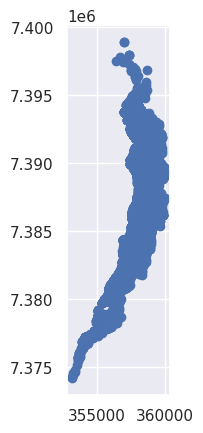

In [ ]:
# Se dibuja un mapa simple para visualizar si se recorto correctamente el area.
gdf_anto_subset.plot()

In [ ]:
#gdf_anto_subset.explore('Fatalities', cmap='autumn_r')

Ahora lo que se quiere hacer crear clusters de la cantidad de accidentes que existen en la comuna de Antofagasta, para lo cual se utiliza el metodo del codo para definir el nuemero adecuado de clusters.

REVISAR EL CODIGO DE LA PROFE, SI COINCIDE CON ESTE, PARA CITARLO

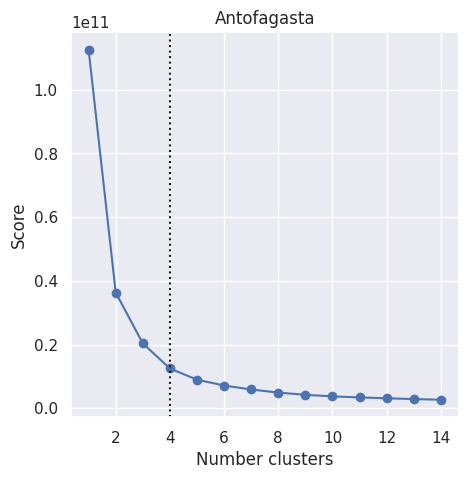

In [ ]:
# Se crea una figura y un solo eje (axs) para graficar, con un tamaño de 5x5 pulgadas
fig, axs = plt.subplots(1, 1, figsize=(5, 5))

# Para poder generar el algoritmo KMeans, se extraen las coordenadas x, y del geodataframe 'gdf_anto_subset'.
x = gdf_anto_subset.get_coordinates()

# Se define un rango de posibles cantidades de clústeres (de 1 a 14) para evaluar.
range_n_clusters = range(1, 15)
inertias = [] # Se crea una lista vacia que almacenara los valores


# Se itera sobre cada número de clústeres en el rango definido
for n_clusters in range_n_clusters:  # Se crea un modelo KMeans con el número actual de clústeres
    model_kmeans = KMeans(
                        n_clusters   = n_clusters,
                        n_init       = 20,  # n_init=20 significa que se reiniciará el algoritmo 20 veces para encontrar la mejor solución.
                        random_state = 123  # random_state=123 asegura que los resultados sean reproducibles.
                    )
    model_kmeans.fit(x)  # Se ajusta el modelo a los datos de coordenadas.

    inertias.append(model_kmeans.inertia_) # # Guarda la inercia del modelo (indica qué tan compactos son los clústeres).

axs.plot(range_n_clusters, inertias, marker='o') # Se grafica la inercia en función del número de clústeres
axs.set_title('Antofagasta') # Se le da un titulo al grafico.
axs.set_xlabel('Number clusters') # Se designa la etiqueta del eje x.
axs.set_ylabel('Score') # Se designa la etiqueta del eje y.
axs.axvline(4, color='k', ls="dotted"); # Se dibuja una línea vertical punteada en x=4 para indicar que 4 podría ser un buen número de clústeres.

In [ ]:
# Se crea una lista vacia para almacenar los resultados de los clusters.
clusters = []

# Para aplicar el algoritmo del clustering es necesario extraer las coordenadas x e y.
x = gdf_anto_subset.get_coordinates()


# Se crea un modelo KMeans con 4 clústeres (basado en el análisis previo del método del codo).
model = KMeans(n_clusters=4)


# Se ajusta el modelo a los datos y predice a qué clúster pertenece cada punto. Se obtiene un array con la etiqueta del cluster para cada observacion.
y_kmeans = model.fit_predict(x)

# Se designa las etiquetas de cluster a la lista vacia 'clusters'.
clusters = y_kmeans
print(len(clusters))  # Se comprueba que coincida con el numero de filas en 'gdf_anto_subset'

6434


In [ ]:
# Se asigna las etiquetas de clúster (obtenidas con KMeans) como una nueva columna llamada 'Cluster', asi se puede identificar a que grupo pertenece cada punto.
gdf_anto_subset['Cluster'] = clusters

<Axes: >

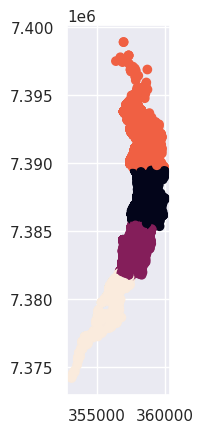

In [ ]:
# Se crea un mapa en donde cada punto se identifica con un color segun el valor de la column a'Cluster', asi se visualiza la ubicacion de los clusters.
gdf_anto_subset.plot('Cluster')

Como se pude observar en el plot anterior, la generación de los 4 clusters que sugiere el metodo del codo no son apropiados (en realidad ningun numero lo sería) esto es debido a dos aspectos: (1) la gran cantidad de puntos (accidentes) en el territorio y (2) debido al apecto geográfico de la comuna, ya que su forma alargada no favorece a la generación de clusters.

Dado esta situación, se decidió cambiar de estrategia, y explorar una agrupación diferente por medio de hexágonos, usando Uber's H3 grid system --> https://www.uber.com/en-GB/blog/h3/

H3

* Es necesario convertir a coordenadas geograficas para asignar

In [ ]:
# Se convierte el sistema de coordenadas a WGS84 (EPSG:4326), que usa latitud y longitud.
gdf_anto_subset = gdf_anto_subset.to_crs(epsg=4326)

In [ ]:

# Se define la resolución H3 que se va a usar (9 en este caso). A mayor número, mayor resolución (celdas más pequeñas)
res = 9
col = f"H3_{res}" #Se crea el nombre de la nueva columna que almacenará los códigos H3.


# Se aplica una función a cada fila del GeoDataFrame para calcular el código H3. Se usa latitud (y) y longitud (x) de la geometría del punto.
# Se usa h3.latlng_to_cell en lugar de h3.geo_to_h3 por cambios en la versión de la librería, # https://github.com/uber/h3-py/issues/100
gdf_anto_subset[col] = gdf_anto_subset.apply(lambda row: str(h3.latlng_to_cell(row.geometry.y, row.geometry.x, res)), axis=1)

In [ ]:
# Se visualiza tres filas al azar gdf_anto_subset
gdf_anto_subset.sample(3)

,Year,Region,Commune,Date,Type,Cause,Fatalities,Serious,Less serious,Slight,geometry,Cluster,H3_9
1601,2019,REGION ANTOFAGASTA,Antofagasta,2019-10-14 00:00:00+00:00,CHOQUE,IMPRUDENCIA DEL CONDUCTOR,0,0,0,0,POINT (-70.39551 -23.65814),1,89b22604523ffff
3809,2020,REGION ANTOFAGASTA,Antofagasta,2020-10-15 00:00:00+00:00,CHOQUE,PERDIDA CONTROL VEHICULO,0,0,0,1,POINT (-70.39467 -23.57545),2,89b2260649bffff
3752,2020,REGION ANTOFAGASTA,Antofagasta,2020-09-24 00:00:00+00:00,CHOQUE,CAUSAS NO DETERMINADAS,0,0,0,0,POINT (-70.3812 -23.62592),0,89b22606163ffff


In [ ]:
# Agrupa los datos por el código H3 y suma los valores de las columnas de severidad de accidentes, asi se obtiene el total de accidentes por celda H3.
h3_df = gdf_anto_subset.groupby(col)[['Fatalities', 'Serious', 'Less serious', 'Slight']].sum().reset_index()

In [ ]:
# Se crea una nueva columna 'Total' que representa la suma de todos los tipos de accidentes por celda.
h3_df['Total'] = h3_df['Fatalities'] + h3_df['Serious'] + h3_df['Less serious'] + h3_df['Slight']
h3_df

,H3_9,Fatalities,Serious,Less serious,Slight,Total
0,89b22604103ffff,0,1,1,4,6
1,89b22604107ffff,0,0,0,0,0
2,89b2260410bffff,0,0,0,3,3
3,89b2260410fffff,1,1,0,15,17
4,89b22604113ffff,0,0,1,1,2
...,...,...,...,...,...,...
352,89b22614e87ffff,0,0,0,1,1
353,89b22614e8bffff,0,0,0,0,0
354,89b22614ec3ffff,0,0,0,1,1
355,89b22614ed3ffff,0,0,0,0,0


Convert to Shapely Polygon

In [ ]:
# Se crea una función llamada 'cell_to_shapely' que toma como entrada un código de celda H3.
def cell_to_shapely(cell):
    coords = h3.cell_to_boundary(cell) # Obtiene los vértices del hexágono H3 correspondiente a la celda.# H3 library’s h3_to_geo_boundary function (renamed cell_to_boundary in v4.0.0)
    flipped = tuple(coord[::-1] for coord in coords) # Se invierte el orden de cada coordenada de (lat, lon) a (lon, lat), que es el formato que espera Shapely.

    return Polygon(flipped) # Se crea y devuelve un polígono de Shapely a partir de los vértices del hexágono.

In [ ]:
# Se aplica la función 'cell_to_shapely' a cada valor de la columna H3 (códigos hexagonales), asi cada celda H3 se convierte en un polígono de Shapely que representa su forma geográfica.
h3_geoms = h3_df[col].apply(lambda x: cell_to_shapely(x))

# Se crea un GeoDataFrame a partir del DataFrame 'h3_df', usando los polígonos generados como geometría, indicando el sistema de coordenadas geográficas WGS84 (EPSG:4326).
h3_gdf = gpd.GeoDataFrame(data=h3_df, geometry=h3_geoms, crs=4326)

In [ ]:
# Se observan las primeras 5 filas con '.head()'.
h3_gdf.head()

,H3_9,Fatalities,Serious,Less serious,Slight,Total,geometry
0,89b22604103ffff,0,1,1,4,6,"POLYGON ((-70.40328 -23.67074, -70.4044 -23.67..."
1,89b22604107ffff,0,0,0,0,0,"POLYGON ((-70.40041 -23.67238, -70.40154 -23.6..."
2,89b2260410bffff,0,0,0,3,3,"POLYGON ((-70.4064 -23.67228, -70.40752 -23.67..."
3,89b2260410fffff,1,1,0,15,17,"POLYGON ((-70.40353 -23.67392, -70.40466 -23.6..."
4,89b22604113ffff,0,0,1,1,2,"POLYGON ((-70.40302 -23.66757, -70.40415 -23.6..."


## Visualization
- Para la visualización, se vuelven a transformar las coordenadas.
- La cartografía busca identificar las zonas con más accidentes, y contrastarlas con los accidentes que registraron muertes.
- La principal fuente es la documentación de geopandas: https://geopandas.org/en/stable/docs/reference/api/geopandas.GeoDataFrame.plot.html#geopandas.GeoDataFrame.plot

## Hexágonos

In [ ]:
# Se carga el limite administrativo de la region de Antofagasta y se convierte en un GeoDataFrame llamado gdf_dpa.
gdf_dpa = gpd.read_file('https://github.com/rociovald/GEOG5990M_Final/raw/refs/heads/main/Data/2.geojson')

In [ ]:
# Se convierte el sistema de coordenadas de 'gdf_dpa' a UTM zona 19 Sur (EPSG:32719)
gdf_dpa = gdf_dpa.to_crs(epsg=32719)
h3_gdf = h3_gdf.to_crs(epsg=32719)
gdf_anto_subset = gdf_anto_subset.to_crs(epsg=32719)

In [ ]:
# Se recorta el GeoDataFrame de hexágonos H3 para que solo incluya los que están dentro del límite de 'gdf_dpa', asi se eliminan hexágonos que están fuera del área de interés.
h3_gdf = gpd.clip(h3_gdf, gdf_dpa)

In [ ]:
# Se Filtra el subconjunto de accidentes para quedarse solo con aquellos que tienen al menos una fatalidad (> 0)
gdf_anto_subset_fatal = gdf_anto_subset[gdf_anto_subset['Fatalities'] > 0]

In [ ]:
# Se visualiza una fila al azar gdf_anto_subset
gdf_anto_subset_fatal.sample()

,Year,Region,Commune,Date,Type,Cause,Fatalities,Serious,Less serious,Slight,geometry,Cluster,H3_9
7203,2022,REGION ANTOFAGASTA,Antofagasta,2022-06-26 00:00:00+00:00,COLISION,ALCOHOL EN CONDUCTOR,1,0,1,0,POINT (358240.216 7390054.221),2,89b2260642fffff


Se usa `pd.explore`
- Fuente: https://stackoverflow.com/questions/73767559/geopandas-explore-how-to-plot-more-than-one-layer

In [ ]:
# Se crea un mapa interactivo con la capa de hexágonos H3, usando '.explore'.
# Cada hexágono se colorea según la columna 'Total' usando una paleta de colores azules
# Se le asigna el nombre 'Total accidents' para el control de capas
m = h3_gdf.explore('Total', cmap='Blues', name='Total accidents')


# Se añade al mismo mapa (m) una segunda capa con los puntos de accidentes fatales, que se dibujan en color rojo y se etiquetan como 'Fatal accidents'.
m = gdf_anto_subset_fatal.explore(m=m, name='Fatal accidents', color='red')
folium.LayerControl().add_to(m)

# Se muestra el mapa interactivo.
m


Ahora se lleva la visualización anterior a un mapa estático

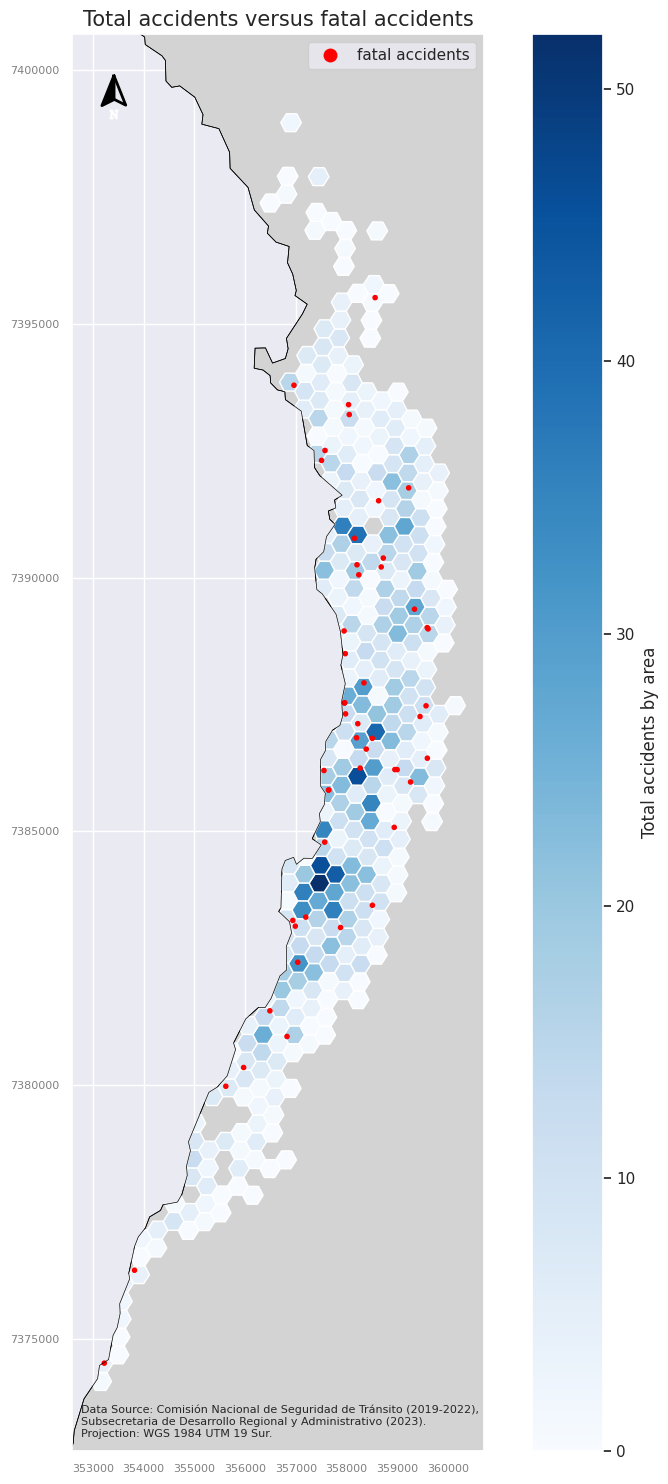

In [ ]:
# Se dibuja el mapa base con los limites administrativos (gdf_dpa).
base = gdf_dpa.plot(color='lightgrey', # The fill colour is chosen.
                    edgecolor='black', # The colour of the contour line of the regions is chosen.
                    linewidth=0.5,     # Grosor de la línea del borde.
                    figsize=(10, 15))  # Tamaño de la figura (ancho x alto)


# Se sagrega una capa con datos de accidentes totales por área (h3_gdf).
h3_gdf.plot(ax=base,         # Se dibuja sobre el mapa base.
            column='Total',  # Columna que se usará para colorear.
            cmap='Blues',    # Paleta de colores (azules).
            legend=True,     # Se muestra la leyenda.
            legend_kwds={'label': 'Total accidents by area'})  # Etiqueta de la leyenda.



# Se superpone otra capa con accidentes fatales (gdf_anto_subset_fatal).
gdf_anto_subset_fatal.plot('Commune',                                     # Es necesario agregar una columna para mostrar la legenda.
                             ax=base,                                     # Se dibuja sobre el mismo mapa base.
                             marker='.',                                  # Tipo de marcador (punto).
                             cmap='autumn',                               # Se asigna un cmap, ya que, al ingresar el parámetro color se pierde la legenda.
                             legend=True,                                 # Se muestra la leyenda
                             legend_kwds={'labels': ['fatal accidents']}) # se renombra la legenda


# Configuración de los ejes del gráfico.
base.tick_params(axis='both',   # specifies that the changes will be applied to both axis
                 which='major', # indicates that the changes will be applied to the major ticks
                 labelsize=8,   # the font size of the mark labels
                 colors='grey') # Color de las etiquetas


# Se establecen los límites del gráfico (coordenadas).
base.set_xlim((xmin, xmax))   # Límite horizontal (x).
base.set_ylim((ymin, ymax))   # Límite vertical (y).


# Eliminates scientific coordinate notation.
base.ticklabel_format(style='plain')


# Se agrega un título al gráfico
plt.title('Total accidents versus fatal accidents',
          fontdict={'fontsize': '15',    # Sets the font size of the label to 15.
                    'fontweight' : '3'}) # Grosor de fuente.

# The following code follows the model of class 6 of this course, in ‘Week_6_Python_as_a_GIS.ipynb’.
# add a North arrow (look at the documentation here: https://github.com/pmdscully/geo_northarrow)
add_north_arrow(ax=base,
                scale=.30, # a value of 0.55 means that the arrow will be reduced to 55% of its original size
                xlim_pos=0.1, # it the horizontal position of the north arrow on the chart
                ylim_pos=.95, # is the vertical position of the north arrow on the chart
                color='#000', # the colour of the arrow is set, #000’ is the hex code for the colour black
                text_scaler=2, # doubles the size of the text (=2)
                text_yT=-1.45) # is the vertical position of the text

# The following line of code was obtained from the following source, modifying the xy parameters for its position: https://medium.com/@alex_44314/use-python-geopandas-to-make-a-us-map-with-alaska-and-hawaii-39a9f5c222c6
base.annotate('''
Data Source: Comisión Nacional de Seguridad de Tránsito (2019-2022),
Subsecretaria de Desarrollo Regional y Administrativo (2023).
Projection: WGS 1984 UTM 19 Sur.''',
              xy=(0.02, 0.01),  # The xy parameter is manually modified to adjust its position.
              xycoords='axes fraction', # Is linked to the xy position
              fontsize=8) # The font size is adjusted


# Volver a dibujar los bordes de gdf_dpa encima de todo
gdf_dpa.boundary.plot(ax=base, edgecolor='black', linewidth=0.5)  # ESTA LINEA S ELE PREGUNTÓ A COPILOT PORQUE SIN ELLA SE VEIA QUE LAS CAPAS (h3_gdf y gdf_anto_subset_fatal) CUBRIAN A gdf_dpa (que representa los límites territoriales con borde negro)
                                                                  # pOR LO QUE SE VOLVIÓ A LLAMAR. EL POMPT FUE ESTE: Indicame como se puede visualizar una capa por encima de las demas, con el proposito de que se vea su contorno? 16 de mayo.


# Se ajustna automáticamente los elementos del gráfico para que no se sobrepongan.
plt.tight_layout()

In [ ]:
#base = h3_gdf.plot('Total', cmap='Blues', figsize=(10, 15))
#gdf_anto_subset_fatal.plot(ax=base, marker='.', c='r')
#plt.title('Total accidents versus fatalities')

Ahora que ya tenemos la distribución de los accidentes por hexágonos vamos a revisar si existe una correlación espacial usando el indice de Moran Global y el indice local.

##Índice de Moran


- Fuente: https://nbviewer.org/github/pysal/splot/blob/main/notebooks/esda_morans_viz.ipynb

In [ ]:
!pip install splot

!pip install esda

In [ ]:
from esda.moran import Moran                    # Importar la clase Moran para calcular el índice de autocorrelación espacial global.
from libpysal.weights.contiguity import Queen   # Importar el método Queen para generar una matriz de pesos espaciales basada en contigüidad.
from splot.esda import moran_scatterplot        # Importar la función para graficar el diagrama de dispersión de Moran.
from splot.esda import plot_moran
from esda.moran import Moran_Local
from splot.esda import lisa_cluster


##Índice de Moran Global

In [ ]:
total = h3_gdf['Total'].values                    # Extraer los valores de la columna 'Total' del GeoDataFrame h3_gdf.
w = Queen.from_dataframe(h3_gdf, use_index=False) # Crear una matriz de pesos espaciales tipo Queen (vecinos que comparten borde o vértice).
w.transform = 'r'                                 # Normalizar los pesos para que cada fila sume 1 (esto es recomendado para el índice de Moran).


('WARNING: ', 277, ' is an island (no neighbors)')
('WARNING: ', 279, ' is an island (no neighbors)')
('WARNING: ', 356, ' is an island (no neighbors)')


In [ ]:
w = Queen.from_dataframe(h3_gdf, use_index=False) # Crea una matriz de vecinos espaciales (tipo Reina) a partir del GeoDataFrame.
moran = Moran(total, w)                           # Calcular el índice de Moran global usando los valores de 'Total' y la matriz de pesos.


moran.I                                           # Devuelve el valor del índice de Moran (mide la autocorrelación espacial).

('WARNING: ', 277, ' is an island (no neighbors)')
('WARNING: ', 279, ' is an island (no neighbors)')
('WARNING: ', 356, ' is an island (no neighbors)')


np.float64(0.40331492827024923)

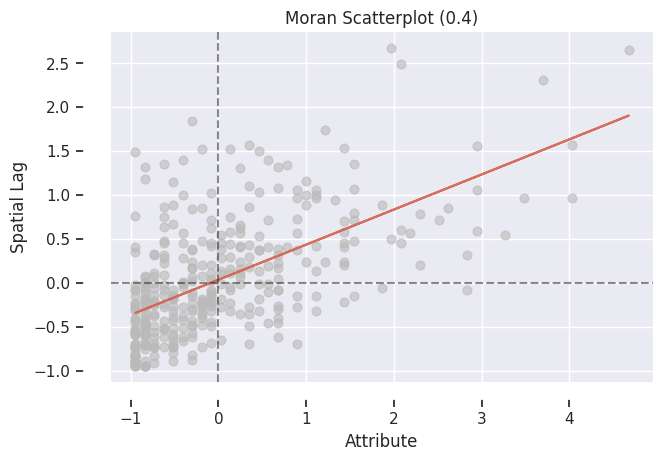

In [ ]:
fig, ax = moran_scatterplot(moran, aspect_equal=True)   # Crear el gráfico de dispersión de Moran (valores originales vs. valores espacialmente promediados).


En el grafico anterior se observa un Indice de Moran de 0.4, lo cual representa una autocorrelacion espacial positiva moderada, esto quiere decir que los valores altos son similares entre si, lo mismo ocurre con los valores bajos, y tienden a agruparse en el espacio.
En el eje x se presentan los valores estandarizados del numero de accidentes. Mientras que en el eje y se observa el rezago espacial de esos valores, esto es el promedio ponderado de los valores en las areas vecinas.
La regresion lineal se presenta en la linea roja, es positiva, confirmando al autocorrelacion positiva.
EL grafico sugiere que existe un patron espacial en los datos, en que las areas con mayor numero de accidentes tienden a estra cerca de otras con similares caracteristicas, lo mismo sucede con las zonas con pocos accidentes.

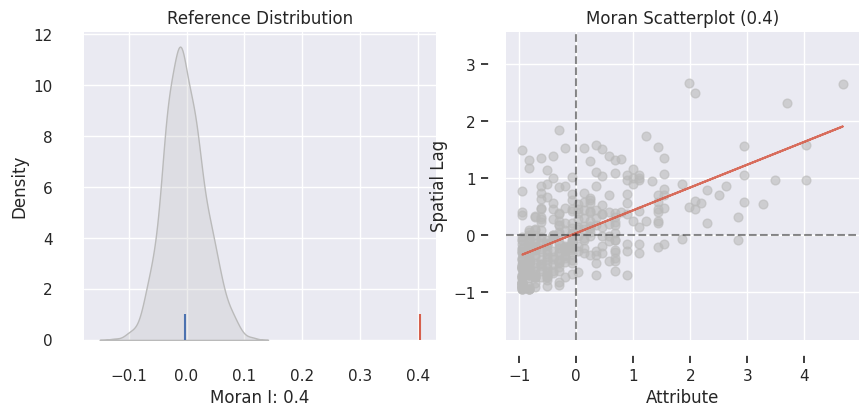

In [ ]:
plot_moran(moran, zstandard=True, figsize=(10,4)) # Se dibuja el gráfico de Moran estandarizado (valores z), con tamaño personalizado.
plt.show()                                        # Muestra el gráfico en pantalla.


In [ ]:
moran.p_sim

np.float64(0.001)

El histograma muestra una distribucion normal de los datos. En color rojo de muestra el indice de Moran (0.4). Se aprecia que el valor observado esta desplazado hacia la derecha de la distribucion simulada, lo cual indica que existe una autocorrelacion espacial positiva significativa, esto quiere decir que los valores similares tienden a agruparse geograficamente.

El scaterrplot es el mismo que se muestra previamnete, reforzando la misma idea que lo que muetsra el histograma.

## índice de Mora Local

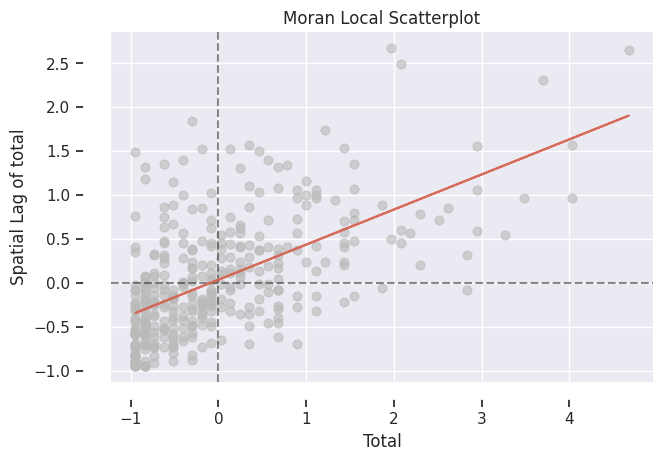

In [ ]:
# Se calcula el índice de Moran Local (LISA) para cada observación del GeoDataFrame, esto permite identificar agrupamientos locales de valores altos o bajos.
moran_loc = Moran_Local(total, w)
fig, ax = moran_scatterplot(moran_loc, zstandard=True)  # Se crea un gráfico de dispersión de Moran usando los valores locales.
                                                        # zstandard=True estandariza los valores para facilitar la interpretación.

ax.set_xlabel('Total')                  # Se etiqueta el eje X con el nombre de la variable original.
ax.set_ylabel('Spatial Lag of total')   # Se etiqueta el eje Y con el nombre del rezago espacial de la variable.
plt.show()                              # Se muestra el grafico.

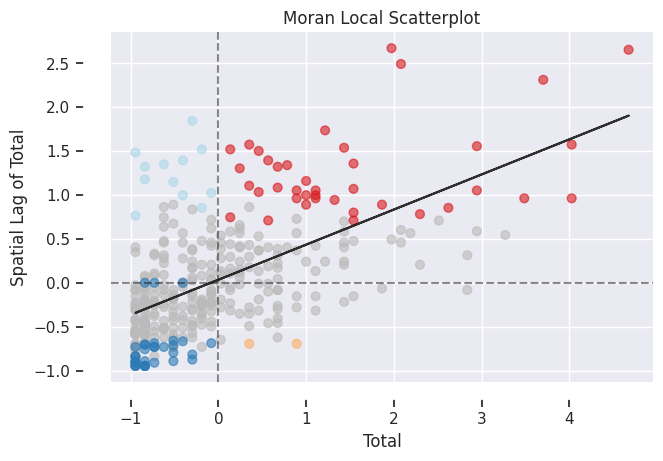

In [ ]:
# Se genera el gráfico de dispersión de Moran Local (LISA), resaltando los puntos con significancia estadística (p < 0.05),lo que permite identificar agrupamientos locales relevantes.
fig, ax = moran_scatterplot(moran_loc, p=0.05)
ax.set_xlabel('Total')                # Etiqueta del eje x.
ax.set_ylabel('Spatial Lag of Total') # Etiqueta del eje y.
plt.show()                            # Se muestra el grafico.

En el grafico anterior en el eje x 'Total' se presentan los valores estandarizados del numero de accidentes de transito. Mientras que en el eje y 'Spatial Lag of Total' representa al rezago espacial.
En color rojo y azul son observaciones estadisticamente signifcicativas (p < 0.05), formando parte del cluster. Los puntos grises no son estadisticamente significativos, podrian ser producto del azar. Sin embargo los puntos celestes y naranjas representan zonas atipicas. La linea negra muestra la tendencia entre ambas variables.

Para la correcta interpretacion del grafico es necesario observar sus cuadrantes:
* Alto-Alto (High-High): Valores altos rodeados de valores altos, son posibles clústeres de riesgo.
* Bajo-Bajo (Low-Low): Valores bajos rodeados de valores bajos, son zonas homogéneamente seguras.
* Alto-Bajo (High-Low): Valor alto rodeado de valores bajos, son posible outlier espacial.
* Bajo-Alto (Low-High): Valor bajo rodeado de valores altos, son otro tipo de outlier.

AQUI PUEDO VER A TRUFFELLO O CITAR OTRA COSA

(7372800.0, 7400700.0)

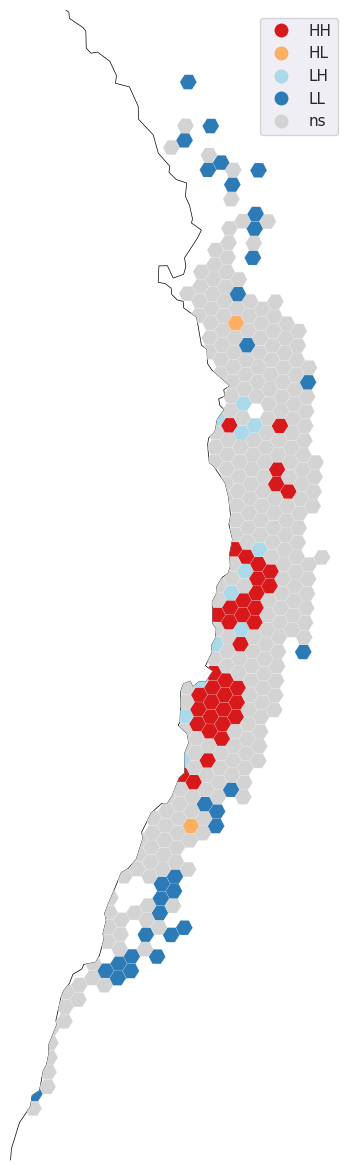

In [ ]:
# Se dibuja el mapa base con los límites administrativos (gdf_dpa).
base = gdf_dpa.plot(color='White',      # The fill colour is chosen
                    edgecolor='black',  # The colour of the contour line of the regions is chosen
                    linewidth=0.5,      # Grosor de la línea del borde
                    figsize=(10, 15))   # Tamaño de la figura (ancho x alto)


# Se superpone el resultado del análisis LISA sobre el mapa base.
# Solo se muestran los clústeres estadísticamente significativos (p < 0.05).
lisa_cluster(moran_loc, h3_gdf, p=0.05, ax=base, figsize = (10, 15))


# Se ajusta el límite horizontal del mapa para enfocar la comuna de Antofagasta.
base.set_xlim((xmin, xmax))

# Se ajusta el límite vertical del mapa para enfocar la comuna de Antofagasta.
base.set_ylim((ymin, ymax))

In [ ]:
# creación de clusters
#years = [2019, 2020, 2021, 2022]
#gdfs_all = [gdfs_all[gdfs_all['Year'] == y] for y in years]
#gdf_2019, gdf_2020, gdf_2021, gdf_2022 = gdfs_all

In [ ]:
# Ensure that the indices are unique before concatenating
#for gdf in [gdfs_2019_utm, gdfs_2020_utm, gdfs_2021_utm, gdfs_2022_utm]:
    #gdf.reset_index(drop=True, inplace=True)

In [ ]:
# Concatenate the GeoDataFrames into a single GeoDataFrame
#gdf_combined = gpd.GeoDataFrame(pd.concat([gdfs_2019_utm, gdfs_2020_utm, gdfs_2021_utm, gdfs_2022_utm], ignore_index=True))

# Print the resulting GeoDataFrame
#print(gdf_combined)

In [ ]:
# Verificar y renombrar columnas, seleccionar columnas específicas para cada GeoDataFrame
#gdfs_renamed = []
#for gdf in gdfs:
    # Verificar si las columnas a renombrar existen en el GeoDataFrame
    #missing_columns = [col for col in renames.keys() if col not in gdf.columns]
    #if missing_columns:
        #print(f"Columnas faltantes en el GeoDataFrame: {missing_columns}")
    #else:
        #gdf_renamed = gdf.rename(columns=renames)
        # Verificar si las columnas seleccionadas existen después de renombrar
        #missing_select_columns = [col for col in select if col not in gdf_renamed.columns]
        #if missing_select_columns:
            #print(f"Columnas seleccionadas faltantes después de renombrar: {missing_select_columns}")
        #else:
            #gdfs_renamed.append(gdf_renamed[select])


In [ ]:
# Asegurarse de que los índices sean únicos antes de concatenar
#for gdf in gdfs_renamed:
    #gdf.reset_index(drop=True, inplace=True)


In [ ]:
#gdfs_2022_utm.dtypes

In [ ]:
#gdfs_2019_utm.sample()

In [ ]:
#gdfs_2019_utm.info()

In [ ]:
# Concatenar los GeoDataFrames en un solo GeoDataFrame
#gdf = gpd.GeoDataFrame(pd.concat(gdfs_renamed, ignore_index=True))

## De aquí para abajo es el codigo de la clase 41 del diplomado (quiero replicar este análisis con los datos de Antofagasta)

In [ ]:
gdf.sample(12)

,Year,Region,Commune,Date,Type,Cause,Fatalities,Serious,Less serious,Slight,geometry
2146,2022,REGION ANTOFAGASTA,ANTOFAGASTA,2022-12-02 00:00:00+00:00,COLISION,IMPRUDENCIA DEL CONDUCTOR,0,0,0,1,POINT (357329.317 7383538.912)
165,2022,REGION ANTOFAGASTA,CALAMA,2022-06-01 00:00:00+00:00,COLISION,IMPRUDENCIA DEL CONDUCTOR,0,0,0,1,POINT (506358.17 7515409.876)
662,2022,REGION ANTOFAGASTA,ANTOFAGASTA,2022-08-04 00:00:00+00:00,COLISION,IMPRUDENCIA DEL CONDUCTOR,0,0,0,0,POINT (359250.782 7391424.738)
1994,2022,REGION ANTOFAGASTA,ANTOFAGASTA,2022-05-09 00:00:00+00:00,ATROPELLO,IMPRUDENCIA DEL CONDUCTOR,0,2,0,0,POINT (356311.265 7380712.426)
1801,2022,REGION ANTOFAGASTA,ANTOFAGASTA,2022-04-06 00:00:00+00:00,COLISION,IMPRUDENCIA DEL CONDUCTOR,0,1,0,0,POINT (357926.801 7385880.782)
1134,2022,REGION ANTOFAGASTA,CALAMA,2022-02-23 00:00:00+00:00,COLISION,ALCOHOL EN CONDUCTOR,0,0,0,0,POINT (507311.896 7517920.308)
1848,2022,REGION ANTOFAGASTA,ANTOFAGASTA,2022-04-06 00:00:00+00:00,CHOQUE,IMPRUDENCIA DEL CONDUCTOR,0,0,0,0,POINT (358855.918 7392410.593)
2135,2022,REGION ANTOFAGASTA,ANTOFAGASTA,2022-11-30 00:00:00+00:00,CHOQUE,IMPRUDENCIA DEL CONDUCTOR,0,0,0,0,POINT (357113.803 7383404.938)
1102,2022,REGION ANTOFAGASTA,ANTOFAGASTA,2022-02-21 00:00:00+00:00,COLISION,ALCOHOL EN CONDUCTOR,0,0,0,0,POINT (357808.158 7386282.913)
328,2022,REGION ANTOFAGASTA,ANTOFAGASTA,2022-06-10 00:00:00+00:00,CHOQUE,IMPRUDENCIA DEL CONDUCTOR,0,0,0,0,POINT (358566.725 7393283.975)


In [ ]:
#Identificar las comunas
comunas = np.sort(gdf['Comuna'].unique())
comunas

KeyError: 'Comuna'

In [ ]:
# cambio de nombre columnas
df.replace({'PEÃ‘ALOLEN': 'PEÑALOLEN',
             'PENALOLEN': 'PEÑALOLEN',
             'PENAFLOR': 'PEÑAFLOR',
             'QUINTA NORMA': 'QUINTA NORMAL',
             'Ã‘UÃ‘OA': 'ÑUÑOA'}, inplace=True)

In [ ]:
# Calcular accidentes por año
accidentes_por_año = gdf.groupby('Año')['Accidentes'].sum().reset_index()

# Gráfico con la cantidad de accidentes en los años 2019, 2020, 2021 y 2022
plt.figure(figsize=(10, 5))  # Ajustar el tamaño del gráfico si es necesario
sns.lineplot(x='Año', y='Accidentes', data=accidentes_por_año, marker='o')
plt.xlabel('Año')
plt.ylabel('Número de Accidentes')
plt.title('Accidentes por Año')
plt.show()

In [ ]:
gdf.groupby('Año')[['Fallecidos', 'Graves', 'Menos_Grav', 'Leves']].sum()

In [ ]:
acc_comunas = gdf.groupby('Comuna')['Accidentes'].sum()
acc_comunas

In [ ]:
# se crea un gráfico con las comunas y la cantidad de accidentes
plt.figure(figsize=(20, 10))
sns.barplot(x=acc_comunas.sort_values().values, y=acc_comunas.sort_values().index, orient='h')
plt.xlabel('Número de Accidentes')
plt.ylabel('Comuna')
plt.title('Accidentes por Comuna')
plt.show()

### Analizando la totalidad de los datos, las comunas de Punete Alto, Santiago y Providencia son las que registran la mayor cantidad de accidentes.

In [ ]:
gdf.groupby(['Comuna', 'Año'])['Accidentes'].sum().unstack().style.background_gradient()

### Desagregando los accidentes por año, en el 2019 la mayoría se concentraron en la comuna de Puente Alto (812), seguido por Maipú (732). En el 2020, la cantidad de accidentes disminuyó a más de la mitad, siendo la comuna de Santiago la que concentró una mayor cantidad (384), en este año evidentemente la disminución se debe al efecto de la pandemia en la movildiad de las personas. En el año 2021, Santiago vuelve a tener el mayor registro de accidentes (497), seguido por Puente Alto (475). Mientras que en el año 2022, Puente Alto concentró la mayor cifra de accidentes (446), seguido por Providencia (318).

In [ ]:
# creación de clusters
years = [2019, 2020, 2021, 2022]
gdfs = [gdf[gdf['Año'] == y] for y in years]
gdf_2019, gdf_2020, gdf_2021, gdf_2022 = gdfs

In [ ]:
# Se aplica el método del codo para definir el número óptimo de clusters para cada año. Para los cuatro años
# el número de clusters es 4.

fig, axs = plt.subplots(2, 2, figsize=(10, 10))
axs = axs.flatten()
for i, gdf in enumerate(gdfs):
    x = gdf.get_coordinates()

    range_n_clusters = range(1, 15)
    inertias = []

    for n_clusters in range_n_clusters:
        modelo_kmeans = KMeans(
                            n_clusters   = n_clusters,
                            n_init       = 20,
                            random_state = 123
                        )
        modelo_kmeans.fit(x)
        inertias.append(modelo_kmeans.inertia_)

    axs[i].plot(range_n_clusters, inertias, marker='o')
    axs[i].set_title(years[i])
    axs[i].set_xlabel('Número clusters')
    axs[i].set_ylabel('Score')
    axs[i].axvline(4, color='k', ls="dotted");


In [ ]:
# Se calcula el modelo K-means, integrando lo obtenido al aplicar el método del codo (4 clusters)
clusters = []
for i, gdf in enumerate(gdfs):
    x = gdf.get_coordinates()

    modelo = KMeans(n_clusters=4)
    y_kmeans = modelo.fit_predict(x)

    clusters.append(y_kmeans)
    print(len(y_kmeans))

## References
<p><a href="https://mapas-conaset.opendata.arcgis.com/datasets/50c493754b5d434c8a1c44b96a6e6e44_0/explore?location=-23.708570%2C-69.342709%2C7.95">[1]</a>Comision Nacional de Seguridad de Transito [CONASET]. 2021. Siniestros de tránsito, región de Antofagasta, Chile, 2019. [Online]. [Accessed 5 May 2025].</p>
<p><a href="https://github.com/FrancescaPontin/GEOG5990">[2]</a>GEOG5990M course materials</p>
<p><a href="add_url_here">[3]</a>Citation 3</p>